<a href="https://colab.research.google.com/github/Sbhasathiti/Probability_Statistics/blob/main/Bhasathiti_Stats_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

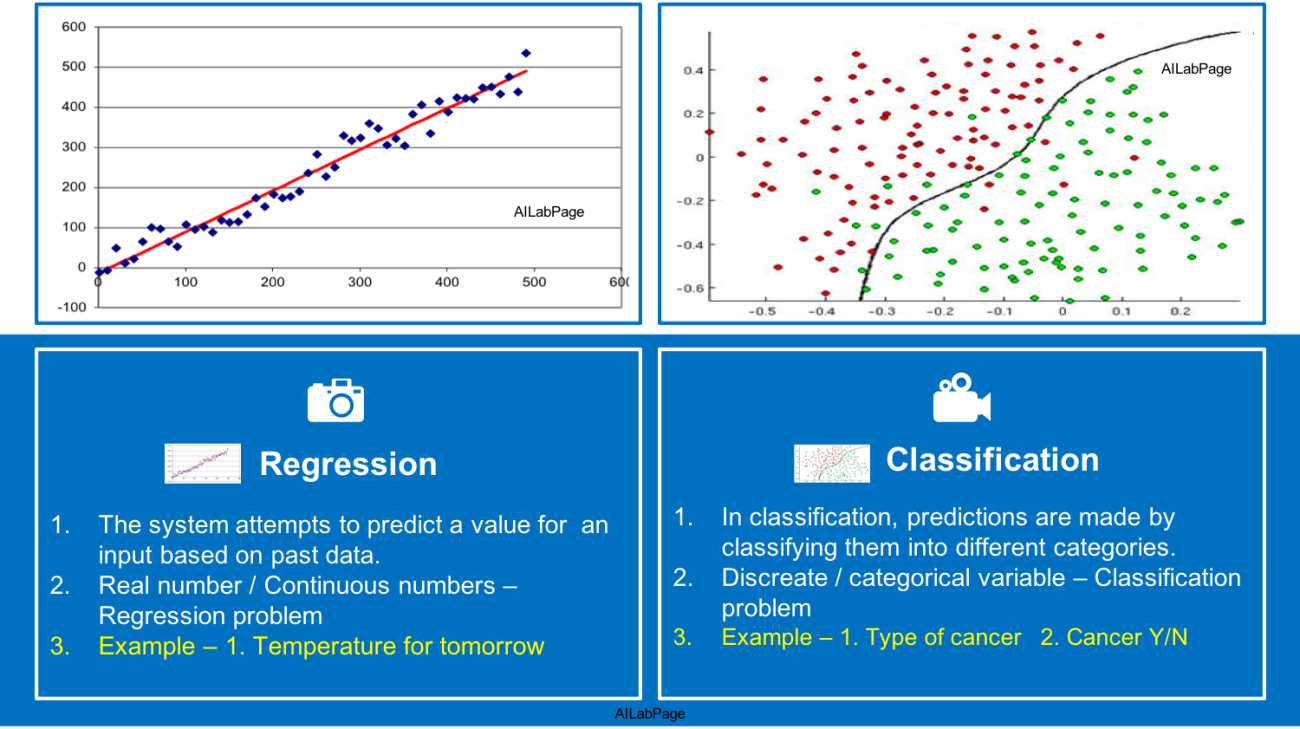

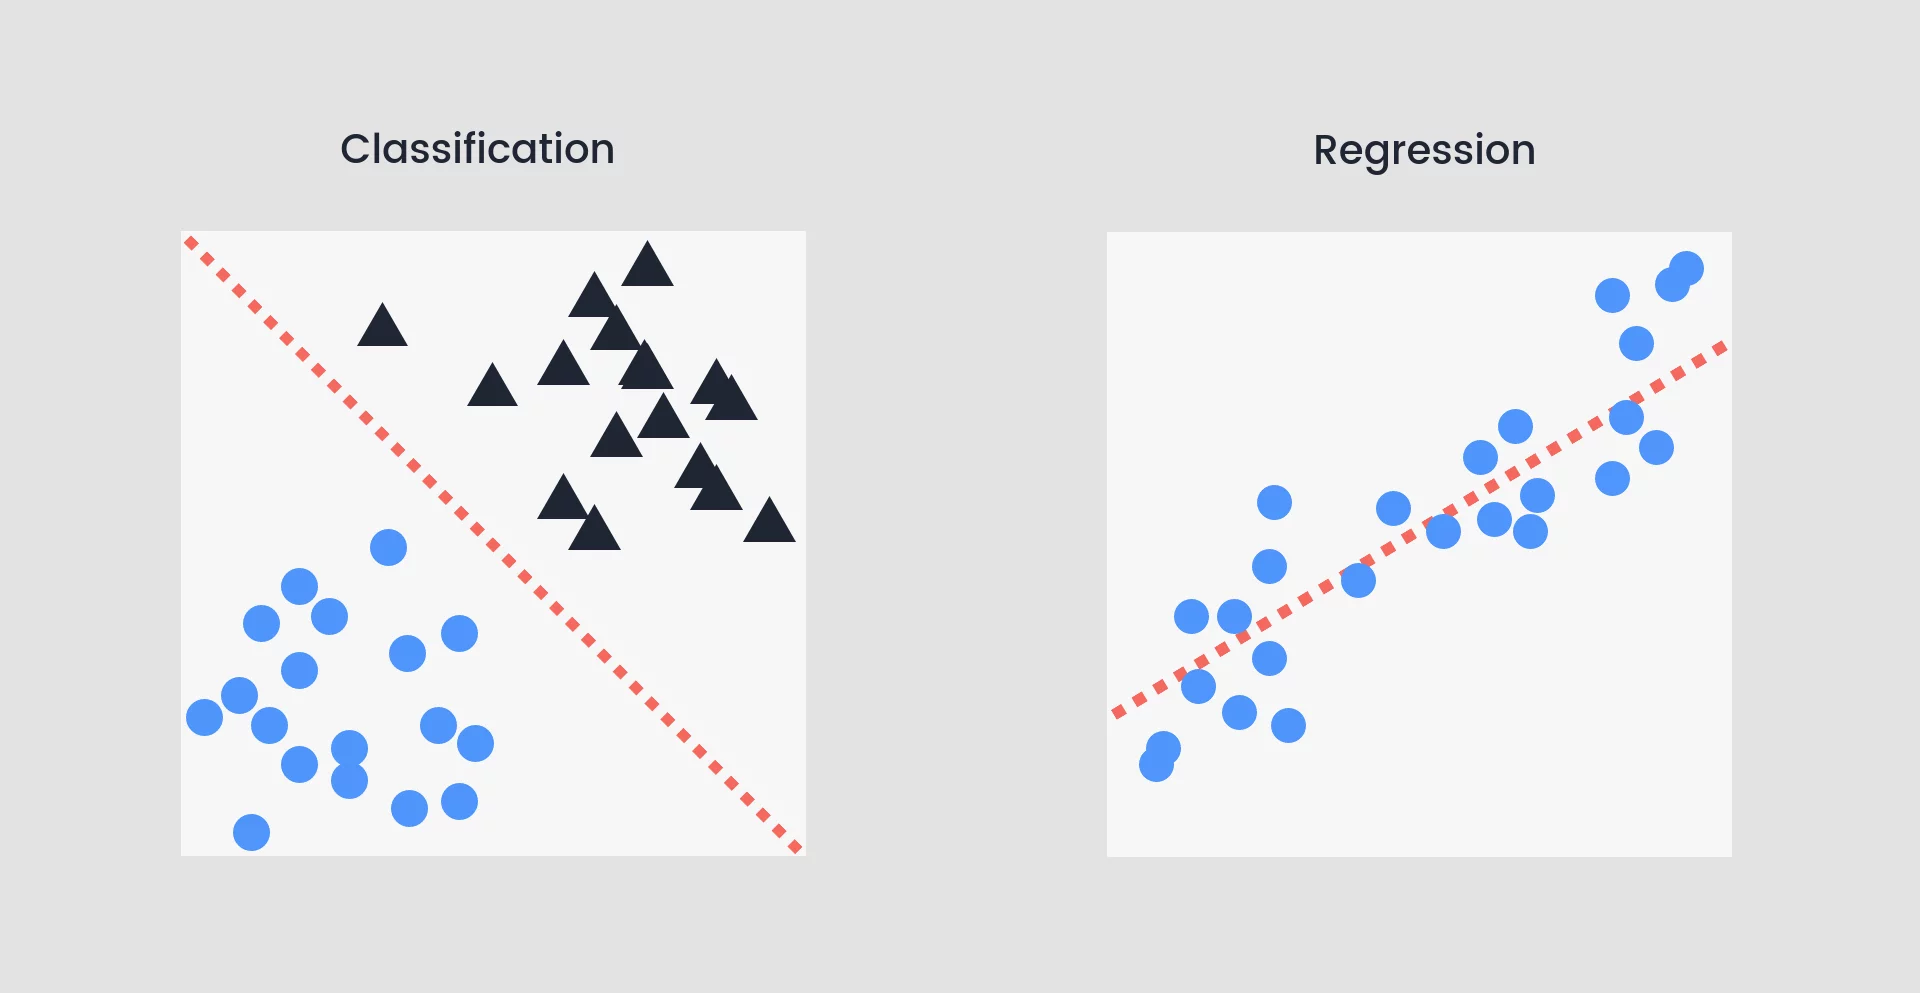

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

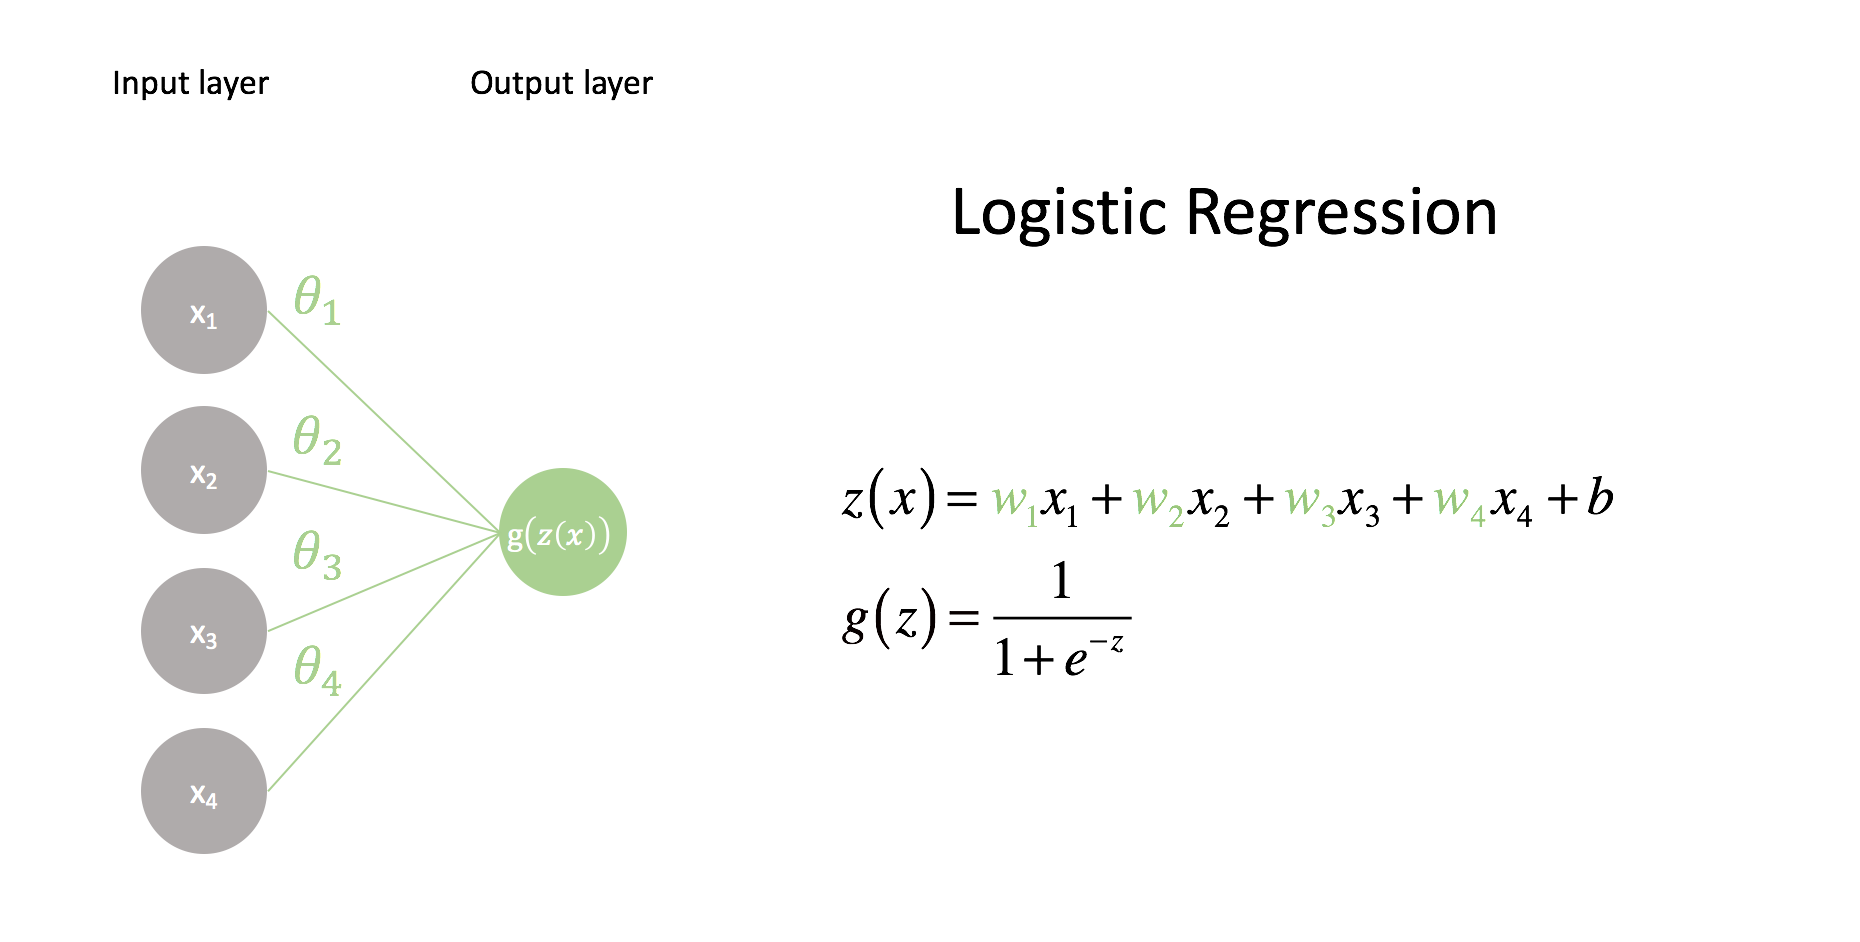

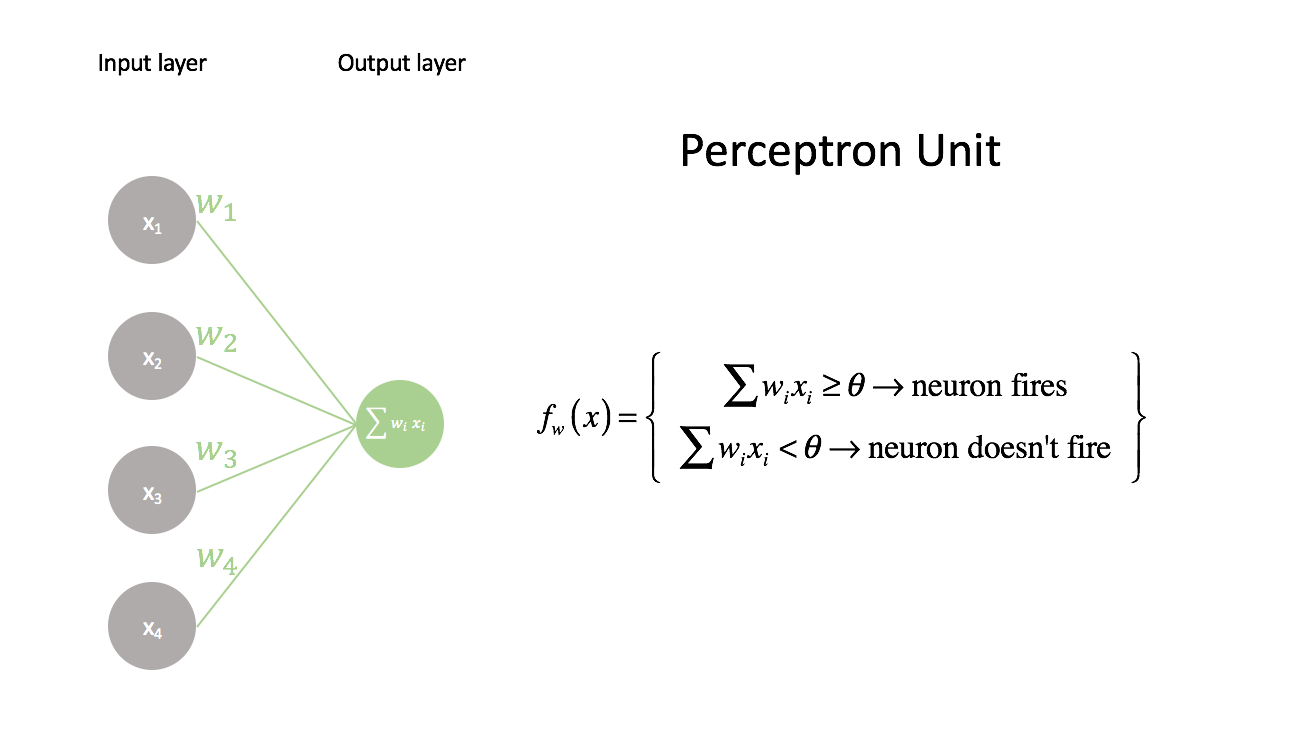

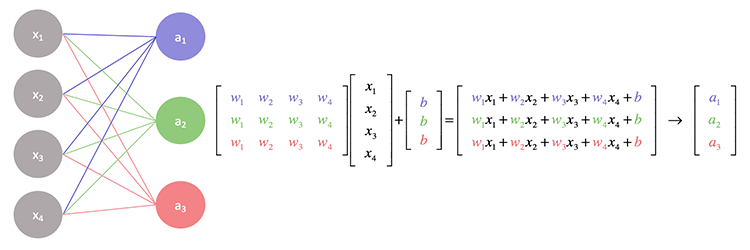

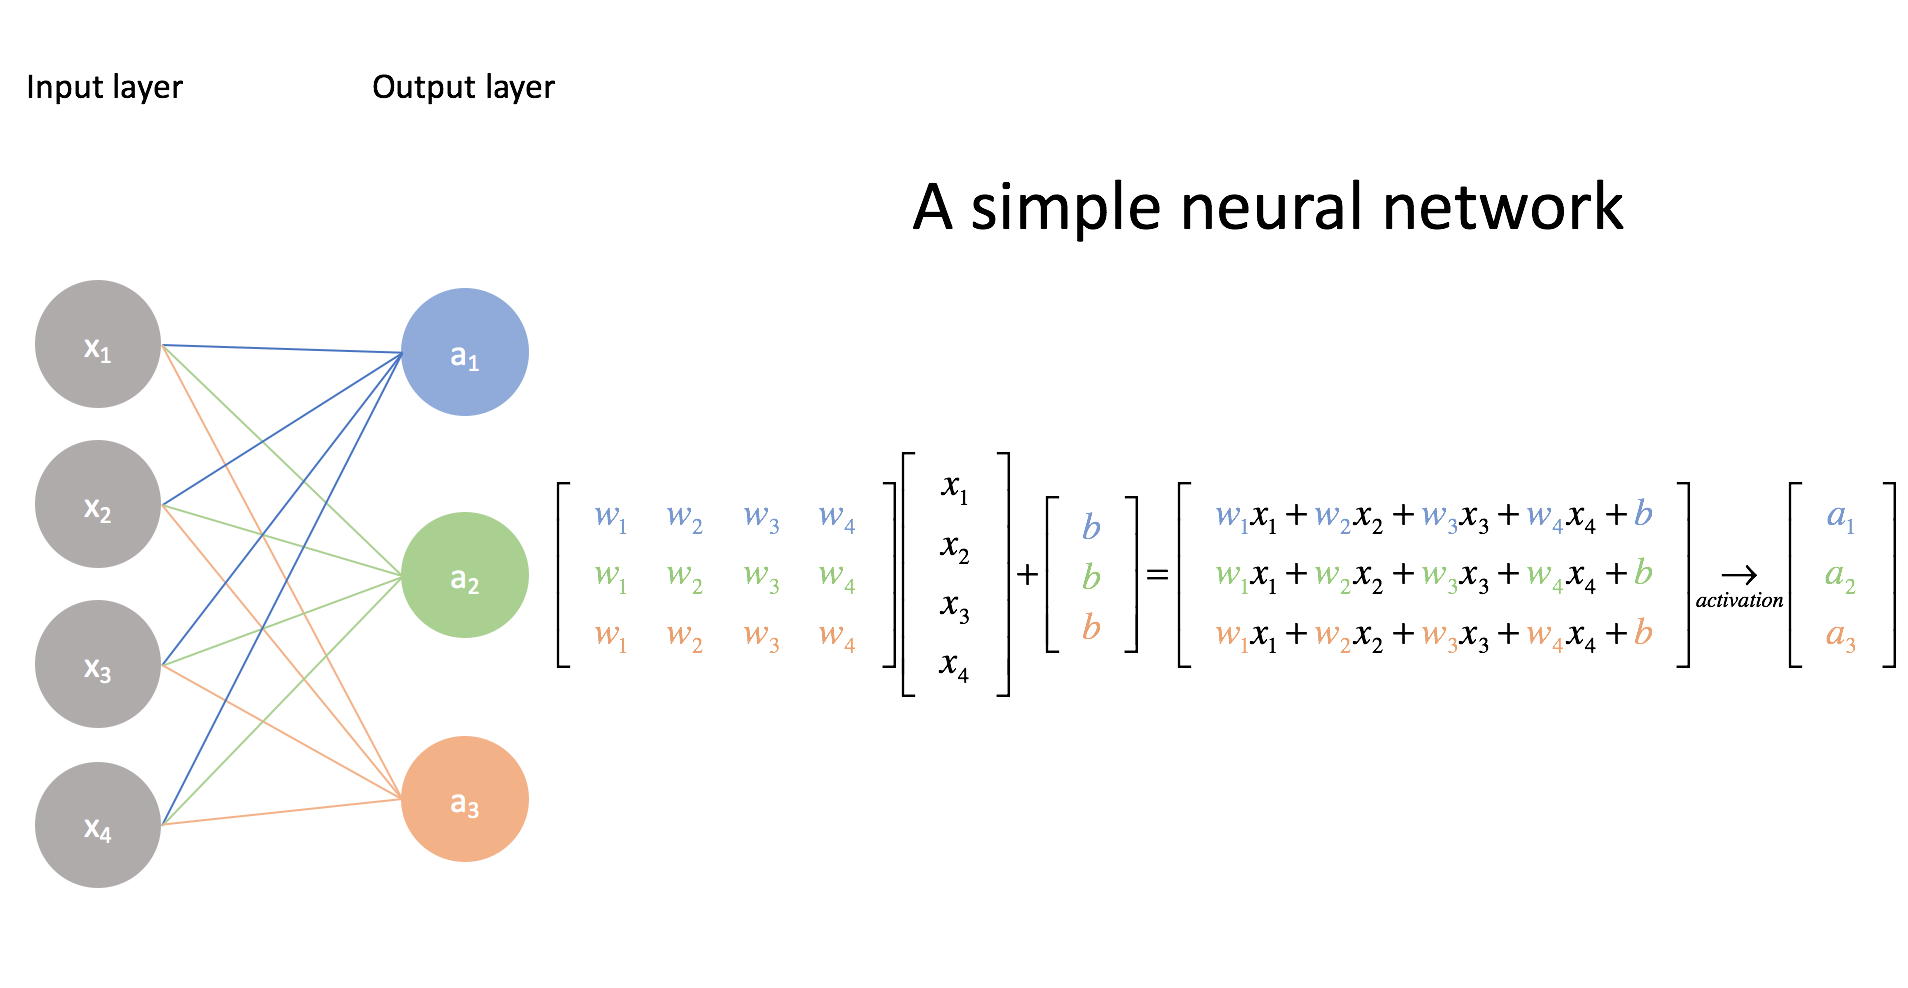

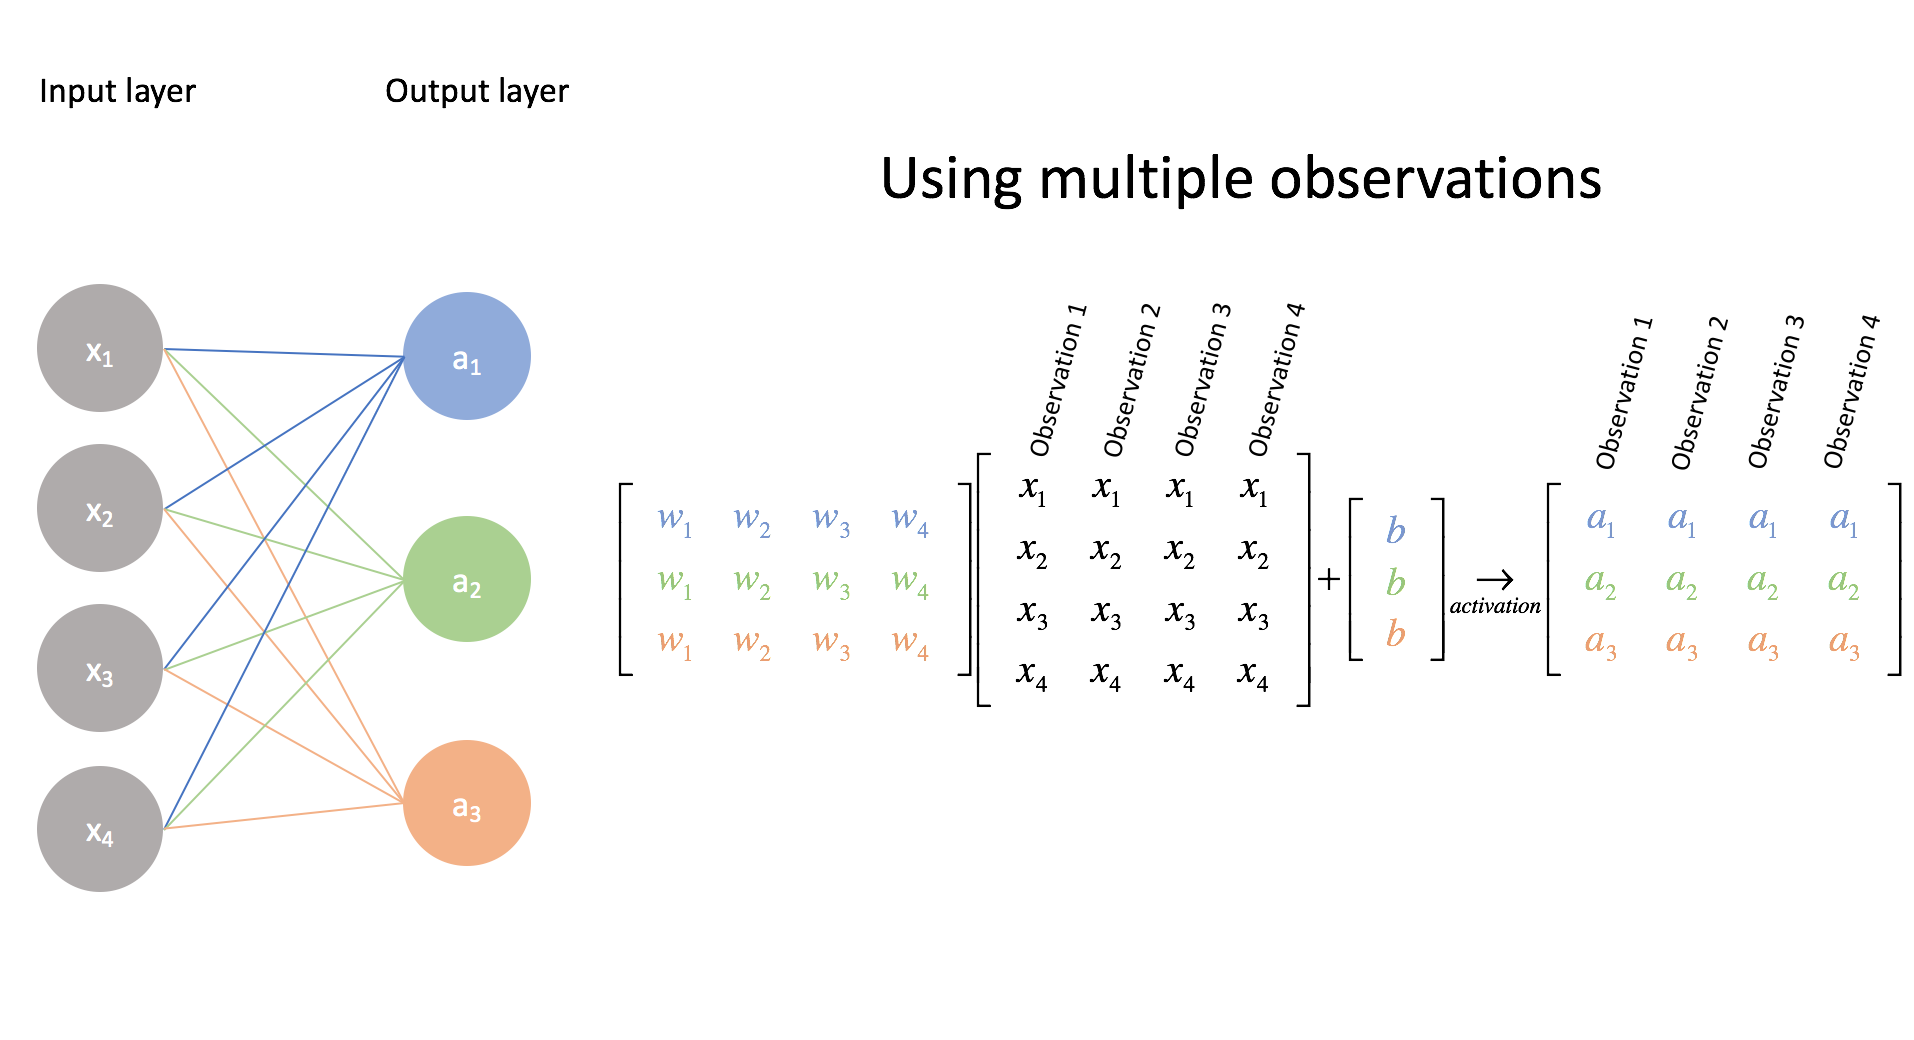

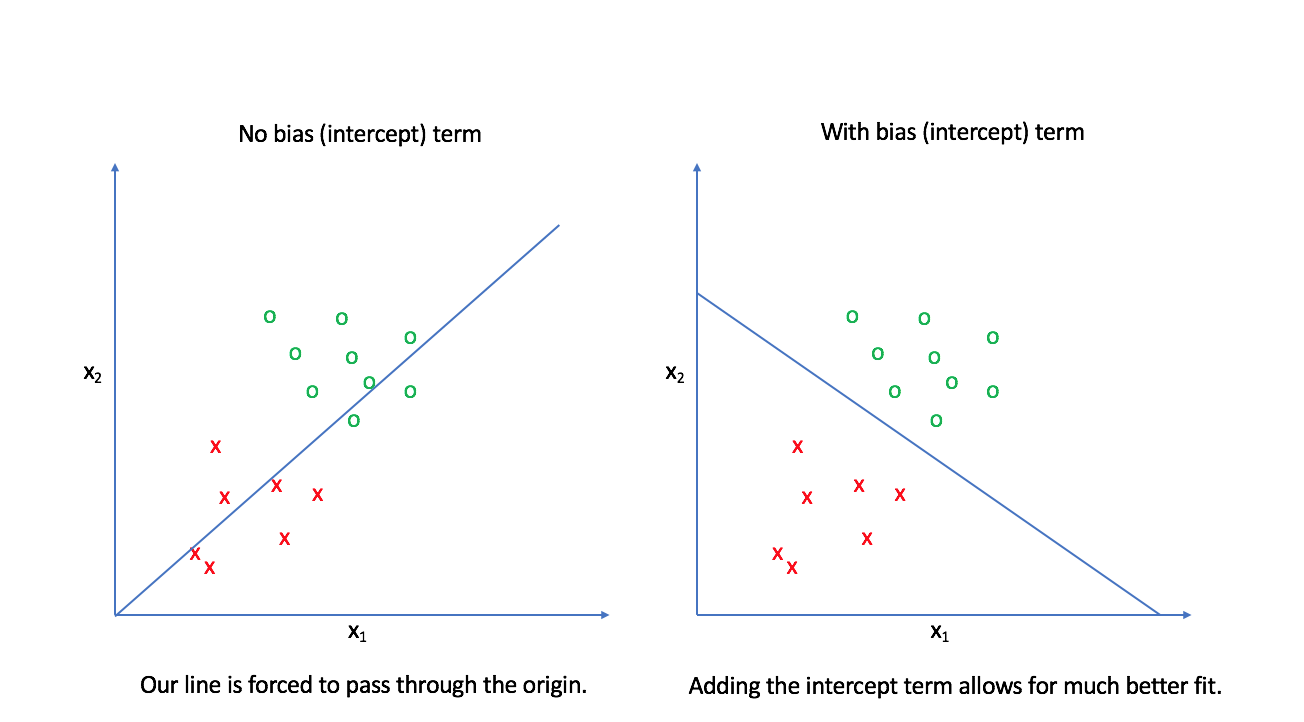

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr #importing data 
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-6b18e_if
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-6b18e_if


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [ ]:
x = np.arange(0,9) #arrange from 0-9 

In [ ]:
x.shape 

(9,)

In [ ]:
x = x[:,None]

In [ ]:
x.shape #9 rows, 1 column

(9, 1)

In [ ]:
y = 3*x-5 #slope formula 

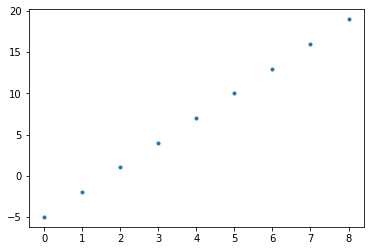

In [ ]:
plt.plot(x,y,'.') #scatter plot 

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 1563.8636474609375 0.47867685556411743 0.3827012777328491
1 580.4534912109375 1.1198222637176514 0.4673479199409485
2 250.05076599121094 1.4932856559753418 0.5043084621429443
3 138.66880798339844 1.7117148637771606 0.5137143135070801
4 100.75082397460938 1.8403477668762207 0.5072239637374878
5 87.47802734375 1.9169657230377197 0.49158889055252075
6 82.47675323486328 1.9634493589401245 0.47071874141693115
7 80.25531768798828 1.9924702644348145 0.44687744975090027
8 78.97180938720703 2.0113673210144043 0.4213758111000061
9 78.00839233398438 2.024390459060669 0.3949725925922394
10 77.15777587890625 2.034001111984253 0.3681069612503052
11 76.35039520263672 2.0416250228881836 0.3410329520702362
12 75.5628662109375 2.0480875968933105 0.31389737129211426
13 74.78726959228516 2.0538673400878906 0.28678491711616516
14 74.02093505859375 2.0592408180236816 0.2597443461418152
15 73.26287078857422 2.064368963241577 0.232803612947464
16 72.51273345947266 2.0693445205688477 0.20597858726978302
17 7

In [ ]:
loss.item()

0.002931454684585333

In [ ]:
m.item()

2.994084119796753

In [ ]:
b.item()

-4.9668989181518555

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 223.3665313720703
2 1000 67.80496215820312
3 1000 23.665000915527344
4 1000 11.104400634765625
5 1000 7.494508743286133
6 1000 6.421961307525635
7 1000 6.069105625152588
8 1000 5.920779705047607
9 1000 5.830968856811523
10 1000 5.7582855224609375
11 1000 5.690994739532471
12 1000 5.62576150894165
13 1000 5.561638355255127
14 1000 5.498347759246826
15 1000 5.435805320739746
16 1000 5.3739848136901855
17 1000 5.312868118286133
18 1000 5.252446174621582
19 1000 5.192713737487793
20 1000 5.1336588859558105
21 1000 5.075276851654053
22 1000 5.017558574676514
23 1000 4.960496425628662
24 1000 4.904082775115967
25 1000 4.848310947418213
26 1000 4.793173789978027
27 1000 4.738664150238037
28 1000 4.684772968292236
29 1000 4.631494998931885
30 1000 4.578824520111084
31 1000 4.5267510414123535
32 1000 4.475271224975586
33 1000 4.424375534057617
34 1000 4.374060153961182
35 1000 4.324315547943115
36 1000 4.275137424468994
37 1000 4.226518630981445
38 1000 4.178452968597412
39 1000 4.130933

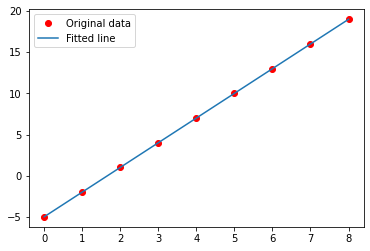

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight

Parameter containing:
tensor([[2.9973]], requires_grad=True)

In [ ]:
model.bias 

Parameter containing:
tensor([-4.9847], requires_grad=True)

In [ ]:
def GPU(data): 
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x): 
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

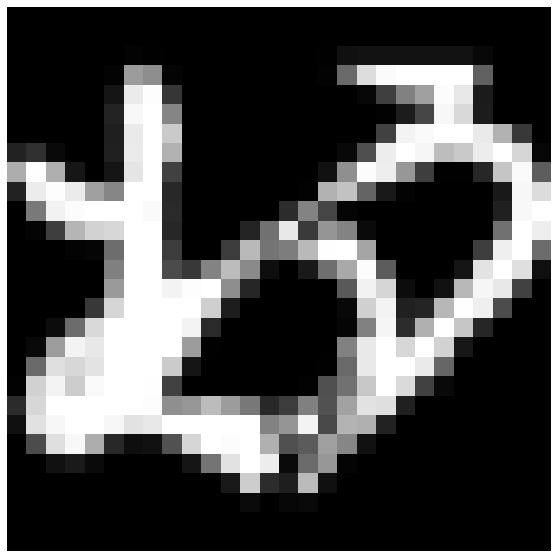

In [ ]:
plot(X[2,0,:,:]) 

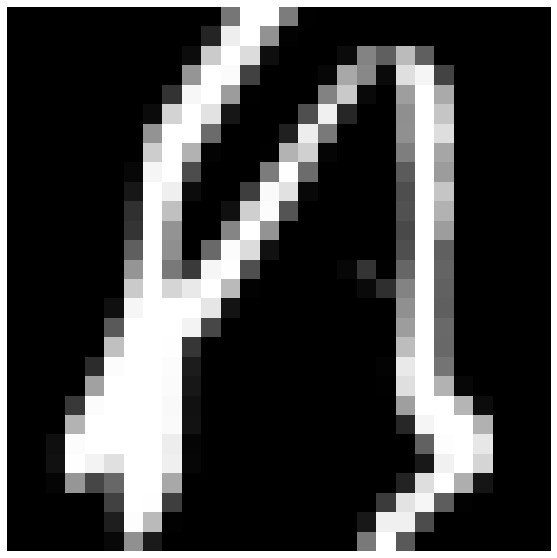

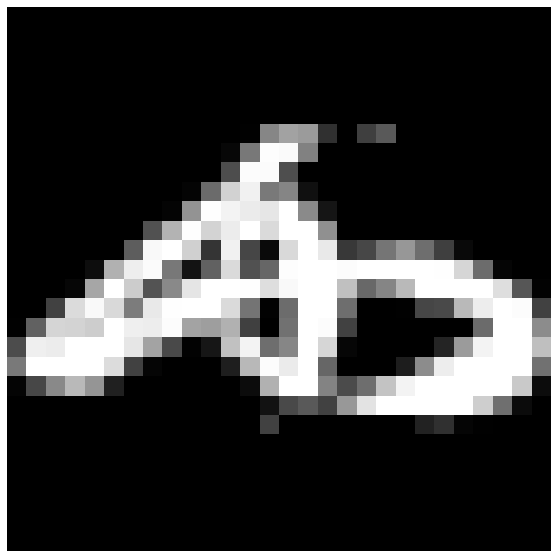

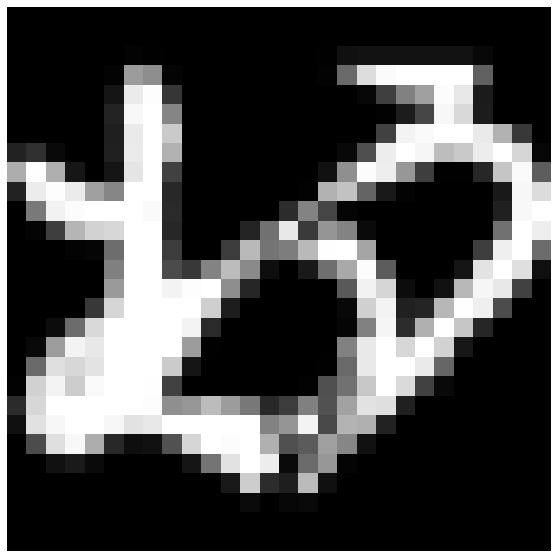

In [ ]:
for i in range(3):
    plot(X[i,0,:,:]) #prints out 3 of each 

In [ ]:
Y

array([8, 7, 0, ..., 0, 4, 9])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

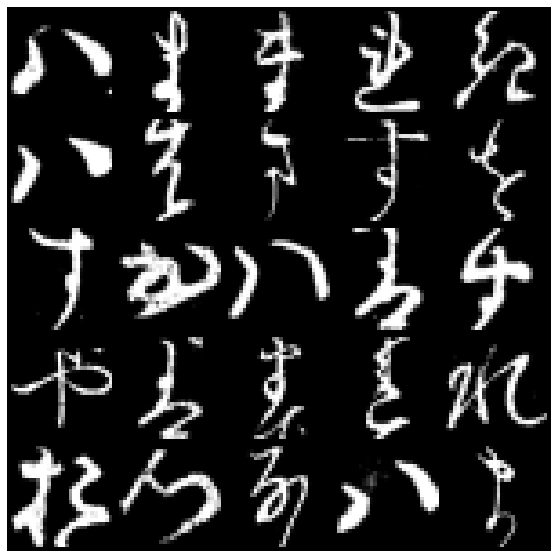

In [ ]:
montage_plot(X[125:150,0,:,:]) #

In [ ]:
X.shape[0] 

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

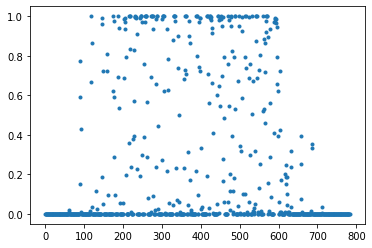

In [ ]:
plt.plot(X[100],'.')

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data") 

'W (5).data'

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100) #10 rows 100 columns
    plt.show()

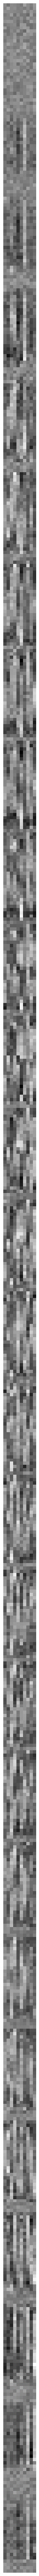

In [ ]:
plot(W[0:784,:10]) #784 rows and 10 columns 

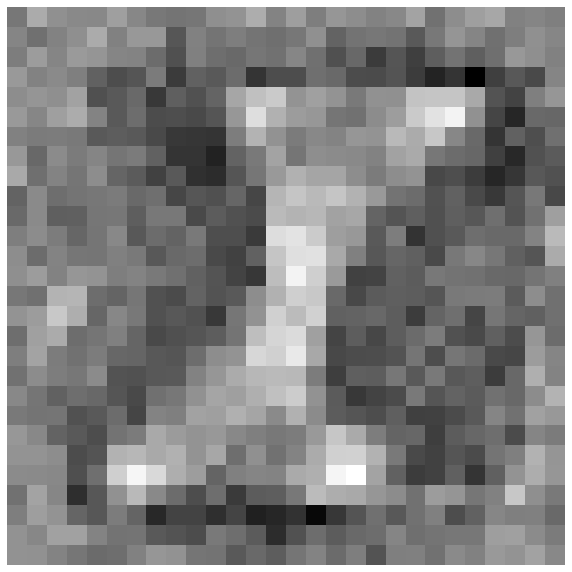

In [ ]:
plot(W[:,1].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

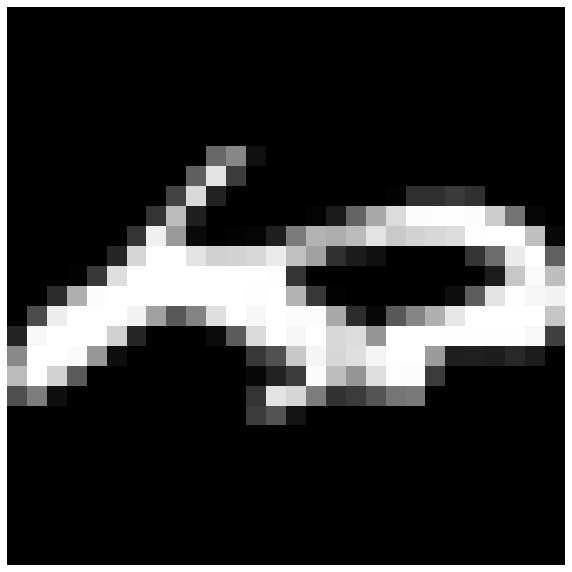

In [ ]:
plot(x[0].reshape(28,28))

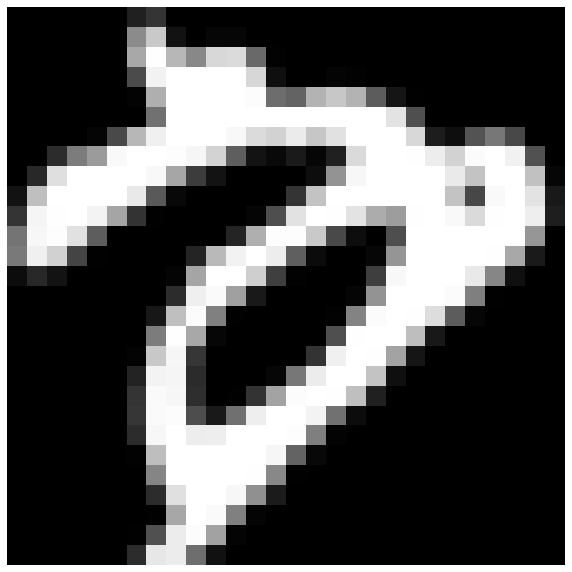

In [ ]:
plot(x[1].reshape(28,28))

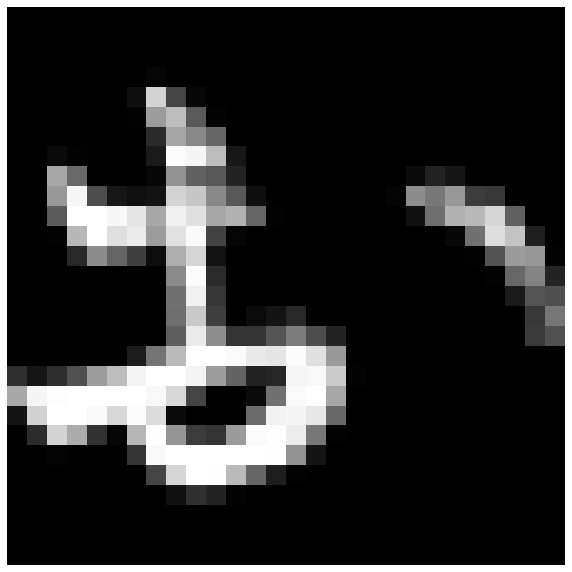

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y

tensor([7., 4., 0., 5., 3., 4., 7., 9., 5., 2., 4., 5., 9., 9., 6., 1., 8., 8.,
        5., 6., 7., 5., 7., 7., 9., 5., 6., 6., 2., 0., 8., 8., 2., 2., 0., 4.,
        8., 7., 5., 3., 6., 4., 7., 8., 7., 7., 9., 6., 7., 9., 2., 6., 9., 1.,
        8., 9., 5., 4., 0., 4., 4., 1., 9., 5., 4., 7., 5., 7., 9., 0., 2., 3.,
        1., 6., 6., 6., 8., 9., 6., 0., 7., 0., 1., 3., 4., 5., 1., 5., 8., 4.,
        1., 0., 6., 0., 0., 8., 2., 5., 4., 1., 8., 3., 3., 6., 1., 9., 9., 6.,
        6., 6., 8., 4., 9., 6., 1., 8., 5., 4., 7., 0., 0., 0., 4., 9., 8., 7.,
        7., 3., 8., 2., 1., 4., 4., 4., 7., 5., 2., 2., 2., 0., 6., 6., 0., 5.,
        8., 7., 1., 3., 7., 8., 2., 9., 0., 5., 8., 9., 6., 8., 1., 3., 6., 2.,
        7., 7., 3., 9., 3., 1., 3., 5., 0., 4., 6., 1., 6., 8., 8., 2., 0., 1.,
        6., 9., 1., 5., 5., 7., 1., 9., 1., 6., 3., 5., 5., 0., 8., 3., 9., 8.,
        2., 9., 4., 0., 3., 1., 7., 4., 6., 7., 6., 8., 1., 2., 4., 4., 4., 0.,
        5., 5., 6., 0., 8., 2., 7., 5., 

In [ ]:
x.shape, W.shape #x is data (1000) and there is 784 inputs. W is the model 

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape #multiply 

torch.Size([1000, 10])

In [ ]:
(x@W).shape 

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

24.1 µs ± 3.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W #matrix multiplication? 

tensor([[ -6.5649, -16.1072,  -7.5047,  ...,  -7.9911,  -8.6859,  -6.6892],
        [ -6.0417, -34.6240,  -8.0208,  ...,  -3.7104, -12.3078, -37.5218],
        [ -2.0515, -16.4342,   0.7870,  ...,  -4.5335,  -0.0580, -15.3379],
        ...,
        [-15.8818, -16.8816,  -3.7254,  ...,   1.0479,  -5.8752, -19.9954],
        [ -4.6965, -16.2807,  -4.6222,  ...,  -3.0172,   1.5259, -10.2880],
        [ -7.7378, -18.5441, -10.8718,  ...,   1.1887,  -1.1919,  -0.1300]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W #sets y equal to data above 

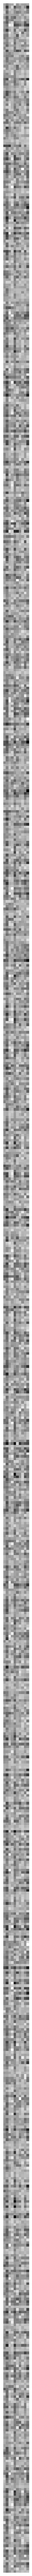

In [ ]:
plot(y2)

In [ ]:
y

tensor([7., 4., 0., 5., 3., 4., 7., 9., 5., 2., 4., 5., 9., 9., 6., 1., 8., 8.,
        5., 6., 7., 5., 7., 7., 9., 5., 6., 6., 2., 0., 8., 8., 2., 2., 0., 4.,
        8., 7., 5., 3., 6., 4., 7., 8., 7., 7., 9., 6., 7., 9., 2., 6., 9., 1.,
        8., 9., 5., 4., 0., 4., 4., 1., 9., 5., 4., 7., 5., 7., 9., 0., 2., 3.,
        1., 6., 6., 6., 8., 9., 6., 0., 7., 0., 1., 3., 4., 5., 1., 5., 8., 4.,
        1., 0., 6., 0., 0., 8., 2., 5., 4., 1., 8., 3., 3., 6., 1., 9., 9., 6.,
        6., 6., 8., 4., 9., 6., 1., 8., 5., 4., 7., 0., 0., 0., 4., 9., 8., 7.,
        7., 3., 8., 2., 1., 4., 4., 4., 7., 5., 2., 2., 2., 0., 6., 6., 0., 5.,
        8., 7., 1., 3., 7., 8., 2., 9., 0., 5., 8., 9., 6., 8., 1., 3., 6., 2.,
        7., 7., 3., 9., 3., 1., 3., 5., 0., 4., 6., 1., 6., 8., 8., 2., 0., 1.,
        6., 9., 1., 5., 5., 7., 1., 9., 1., 6., 3., 5., 5., 0., 8., 3., 9., 8.,
        2., 9., 4., 0., 3., 1., 7., 4., 6., 7., 6., 8., 1., 2., 4., 4., 4., 0.,
        5., 5., 6., 0., 8., 2., 7., 5., 

In [ ]:
one_hot(y) #converts to format that is easy to use 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


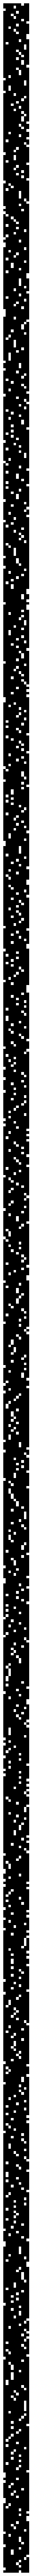

In [ ]:
plot(one_hot(y) # plots data )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


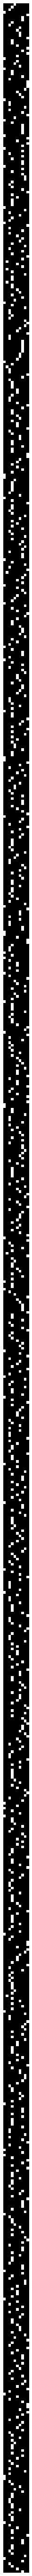

In [ ]:
plot(one_hot(torch.argmax(y2,1))) #gives indices of maximum values 

In [ ]:
y

tensor([7., 4., 0., 5., 3., 4., 7., 9., 5., 2., 4., 5., 9., 9., 6., 1., 8., 8.,
        5., 6., 7., 5., 7., 7., 9., 5., 6., 6., 2., 0., 8., 8., 2., 2., 0., 4.,
        8., 7., 5., 3., 6., 4., 7., 8., 7., 7., 9., 6., 7., 9., 2., 6., 9., 1.,
        8., 9., 5., 4., 0., 4., 4., 1., 9., 5., 4., 7., 5., 7., 9., 0., 2., 3.,
        1., 6., 6., 6., 8., 9., 6., 0., 7., 0., 1., 3., 4., 5., 1., 5., 8., 4.,
        1., 0., 6., 0., 0., 8., 2., 5., 4., 1., 8., 3., 3., 6., 1., 9., 9., 6.,
        6., 6., 8., 4., 9., 6., 1., 8., 5., 4., 7., 0., 0., 0., 4., 9., 8., 7.,
        7., 3., 8., 2., 1., 4., 4., 4., 7., 5., 2., 2., 2., 0., 6., 6., 0., 5.,
        8., 7., 1., 3., 7., 8., 2., 9., 0., 5., 8., 9., 6., 8., 1., 3., 6., 2.,
        7., 7., 3., 9., 3., 1., 3., 5., 0., 4., 6., 1., 6., 8., 8., 2., 0., 1.,
        6., 9., 1., 5., 5., 7., 1., 9., 1., 6., 3., 5., 5., 0., 8., 3., 9., 8.,
        2., 9., 4., 0., 3., 1., 7., 4., 6., 7., 6., 8., 1., 2., 4., 4., 4., 0.,
        5., 5., 6., 0., 8., 2., 7., 5., 

In [ ]:
torch.argmax(y2,1) 

tensor([4, 3, 2, 0, 9, 7, 7, 3, 2, 6, 5, 6, 6, 9, 3, 3, 5, 9, 7, 9, 5, 0, 5, 4,
        6, 0, 3, 3, 7, 2, 9, 9, 9, 8, 5, 6, 7, 0, 2, 2, 8, 2, 7, 9, 4, 0, 3, 7,
        7, 7, 7, 0, 9, 5, 9, 7, 0, 7, 2, 7, 3, 7, 7, 0, 7, 3, 7, 8, 8, 3, 2, 3,
        7, 9, 3, 5, 3, 3, 3, 0, 8, 2, 6, 3, 2, 0, 9, 2, 7, 2, 5, 7, 6, 3, 8, 2,
        7, 3, 9, 7, 1, 5, 7, 1, 3, 8, 3, 3, 1, 3, 3, 5, 6, 3, 7, 4, 0, 3, 8, 2,
        2, 3, 2, 8, 9, 8, 6, 5, 9, 2, 2, 7, 7, 7, 7, 7, 6, 6, 5, 0, 3, 1, 2, 2,
        9, 7, 2, 3, 3, 3, 5, 5, 3, 2, 2, 5, 9, 7, 3, 3, 5, 6, 3, 5, 5, 9, 2, 3,
        6, 6, 3, 3, 7, 3, 3, 9, 9, 6, 5, 3, 5, 7, 3, 0, 0, 4, 3, 3, 3, 3, 2, 6,
        0, 3, 9, 3, 3, 2, 3, 8, 6, 3, 5, 3, 7, 2, 3, 8, 3, 7, 6, 8, 7, 2, 7, 7,
        0, 3, 8, 2, 9, 1, 8, 7, 5, 7, 0, 5, 7, 8, 5, 4, 3, 0, 8, 3, 5, 9, 8, 5,
        3, 3, 6, 7, 7, 6, 8, 3, 5, 2, 0, 3, 7, 7, 2, 0, 3, 7, 2, 7, 8, 5, 5, 6,
        3, 7, 7, 6, 5, 8, 2, 2, 3, 6, 3, 0, 3, 3, 9, 7, 6, 3, 9, 3, 8, 3, 5, 3,
        4, 4, 7, 3, 3, 0, 0, 9, 6, 2, 7,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b #????

tensor(0.0780, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0789, device='cuda:0')

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape 

torch.Size([784, 10])

In [ ]:
W[:,0].shape 

torch.Size([784])

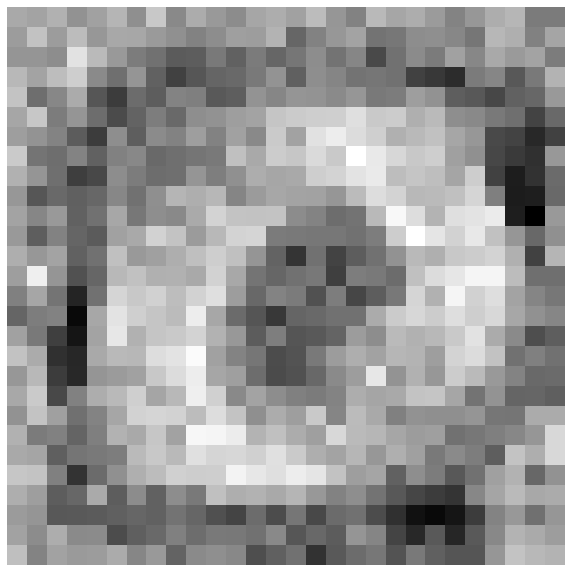

In [ ]:
plot(W[:,0].reshape(28,28)) 

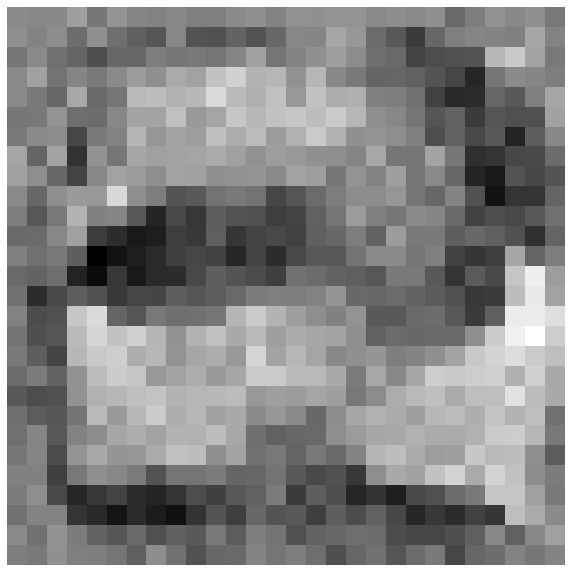

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

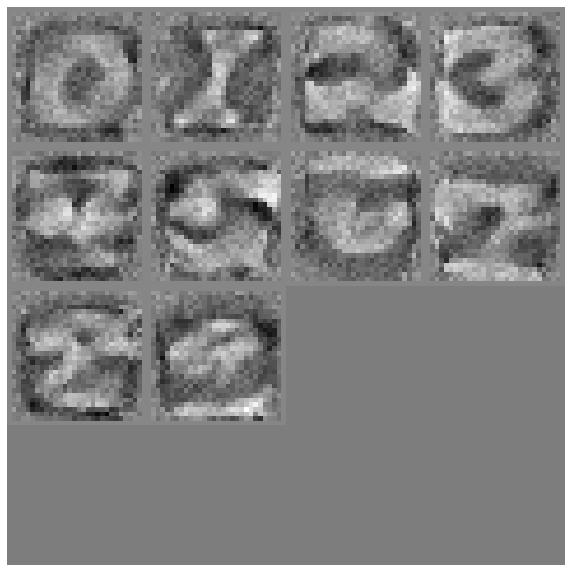

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots(): 
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

wandb: Currently logged in as: sbhasathiti. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


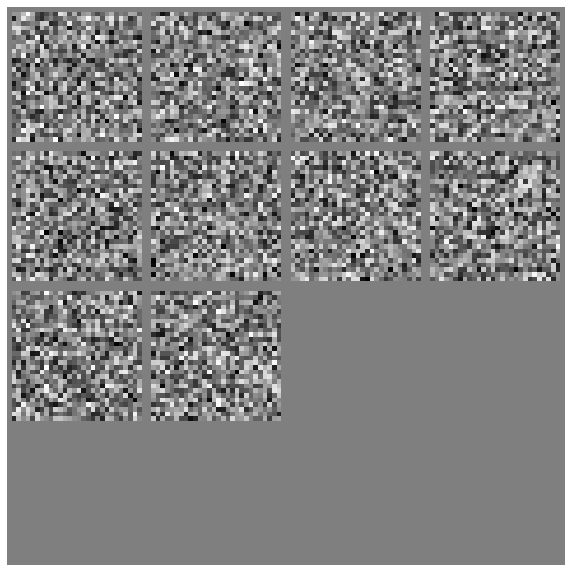

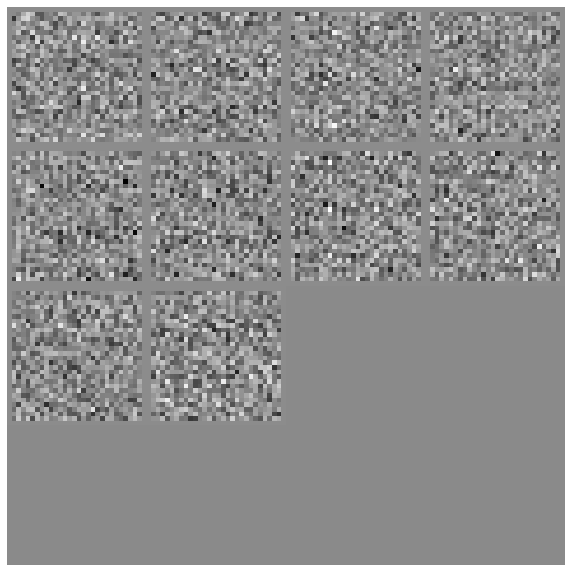

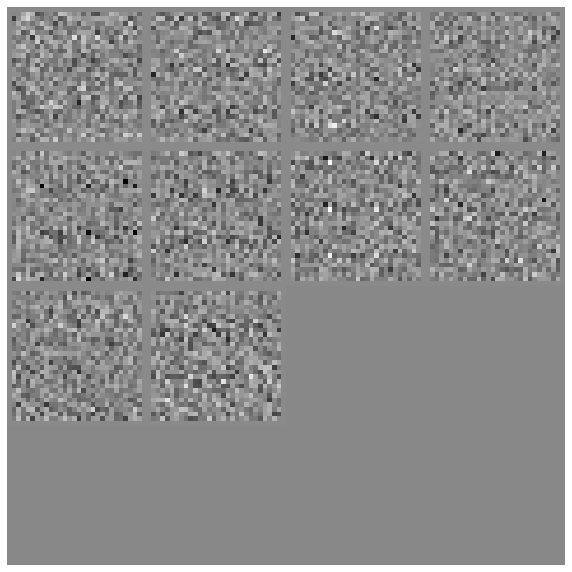

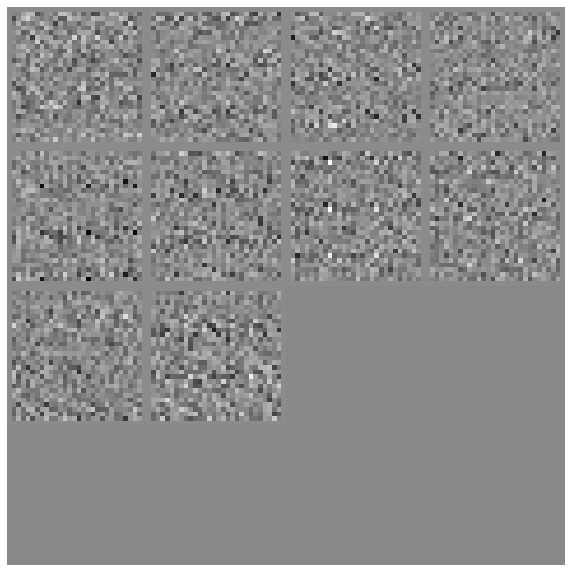

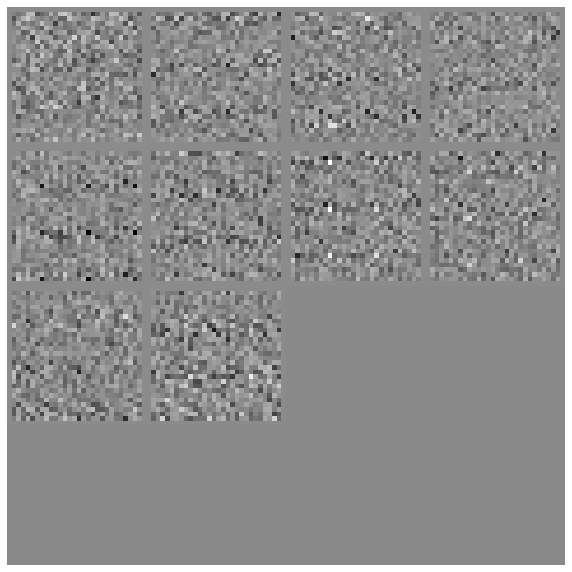

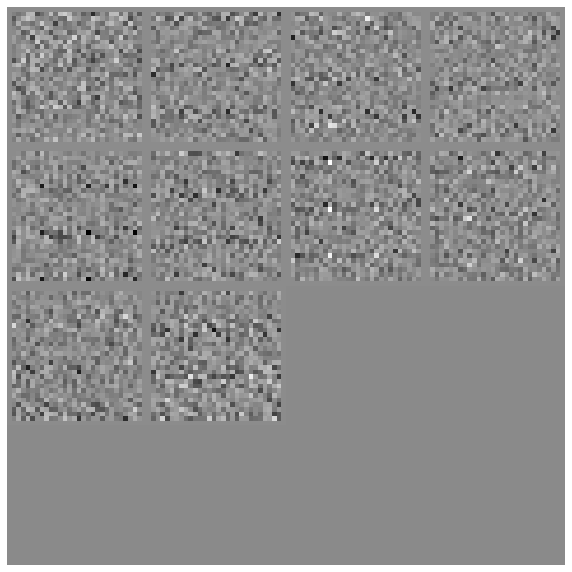

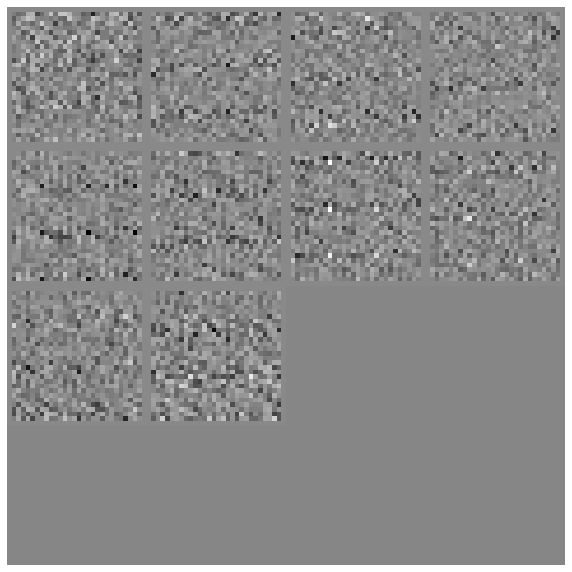

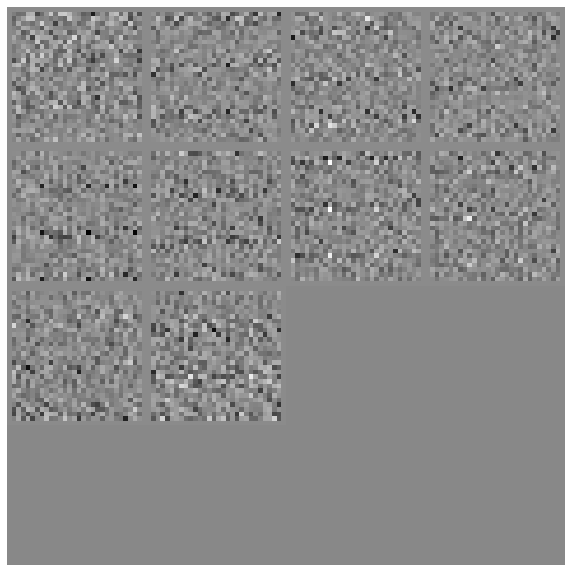

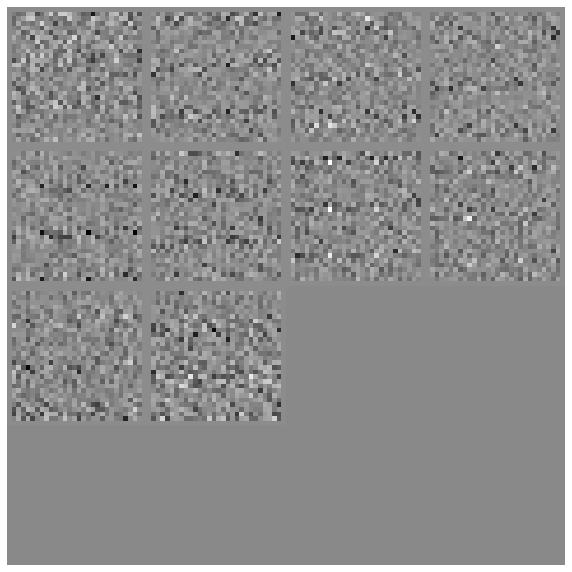

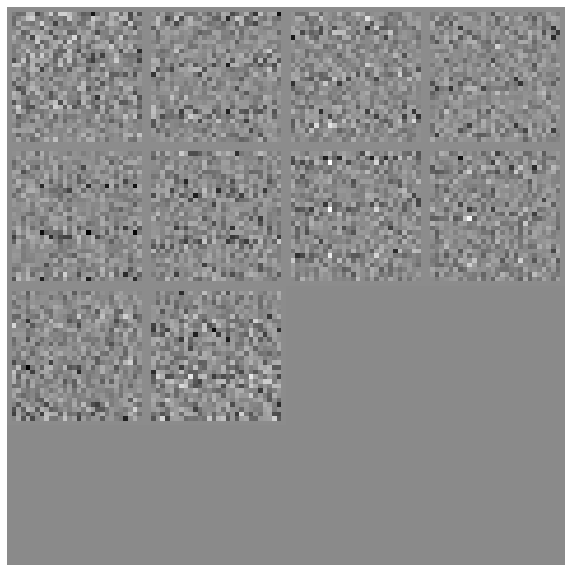

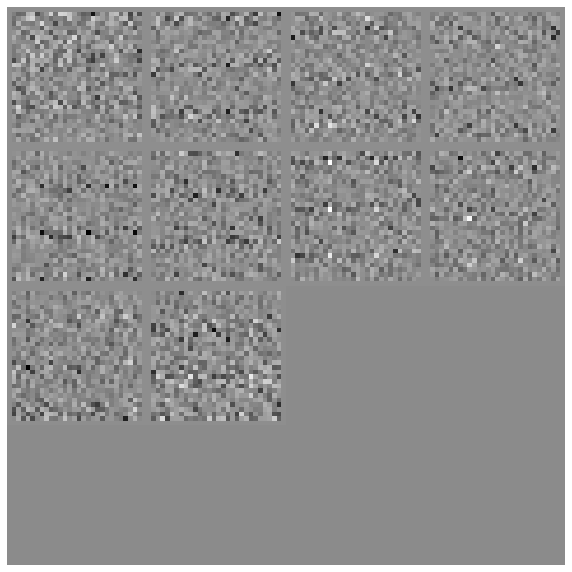

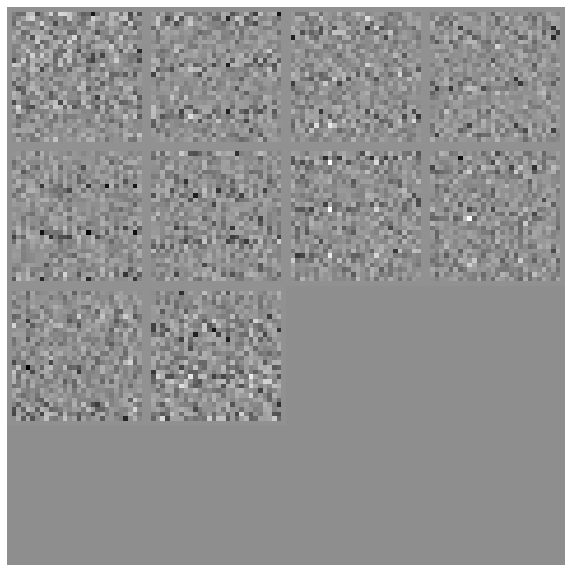

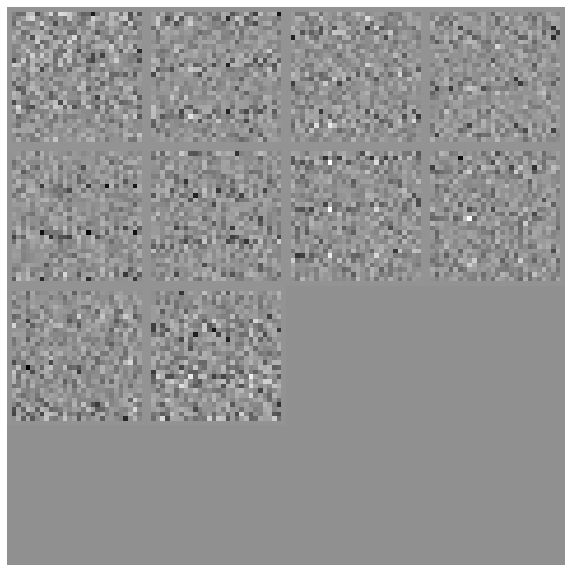

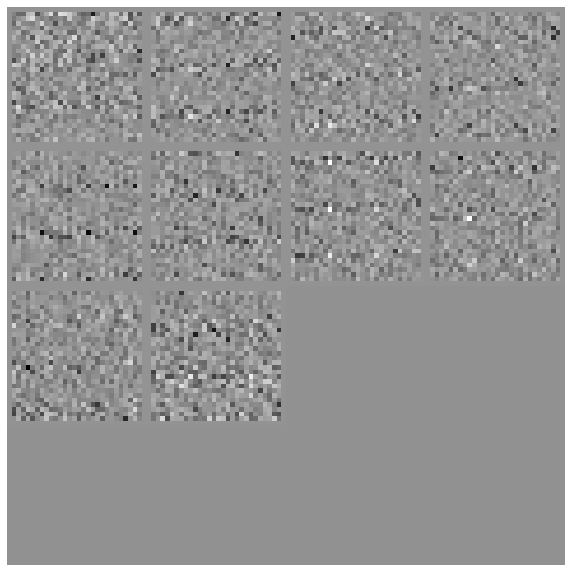

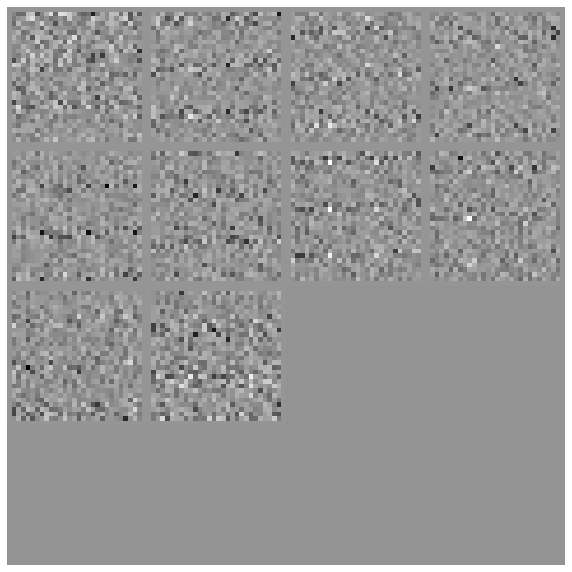

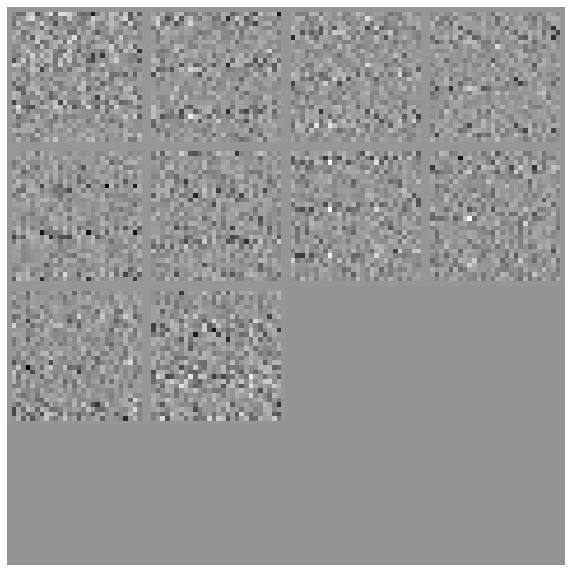

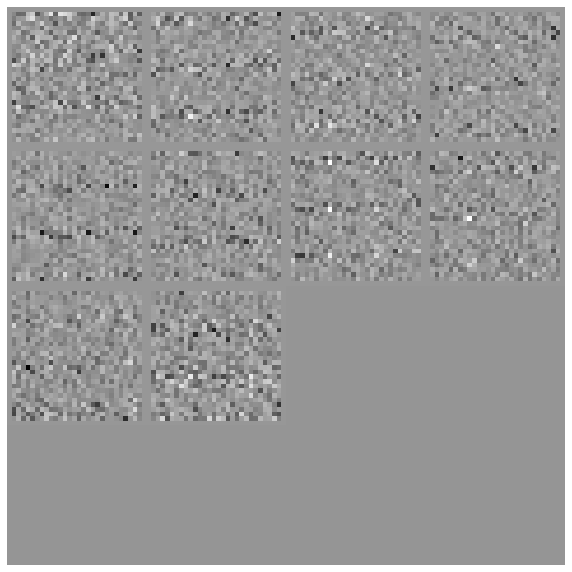

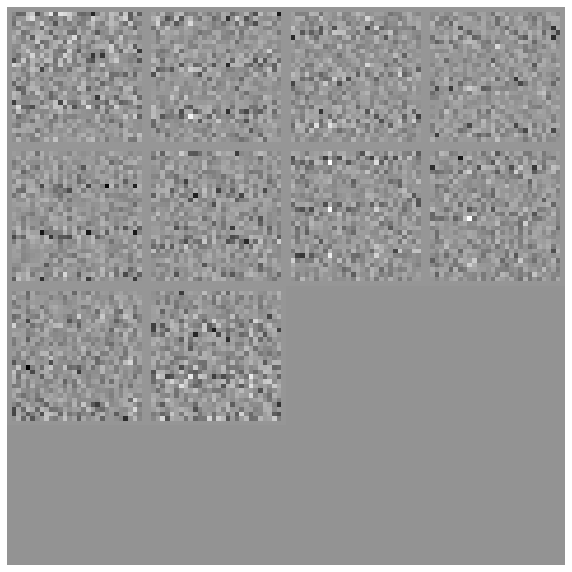

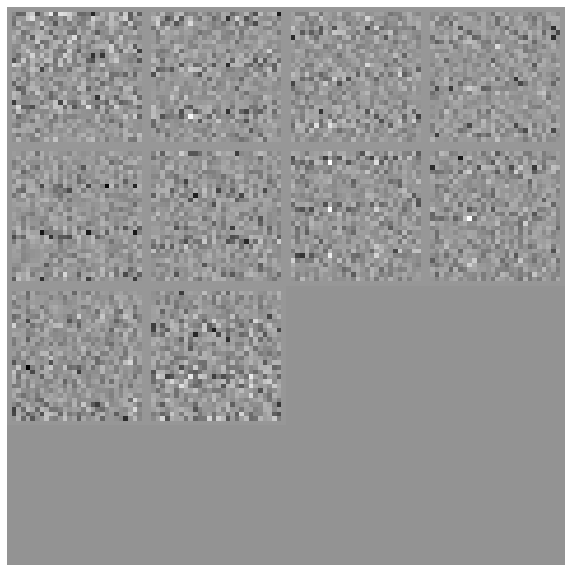

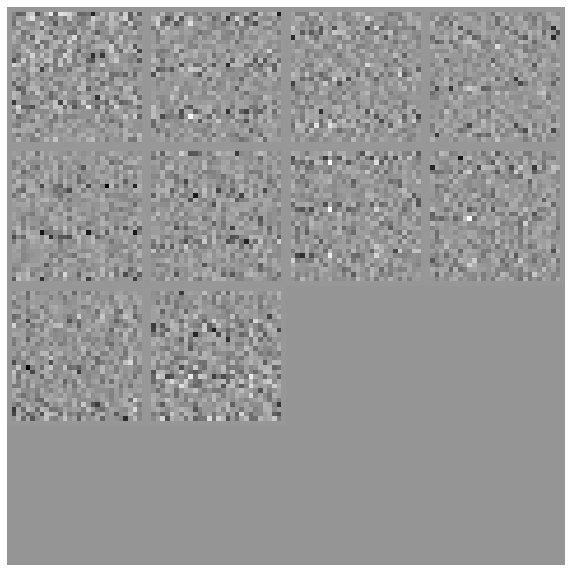

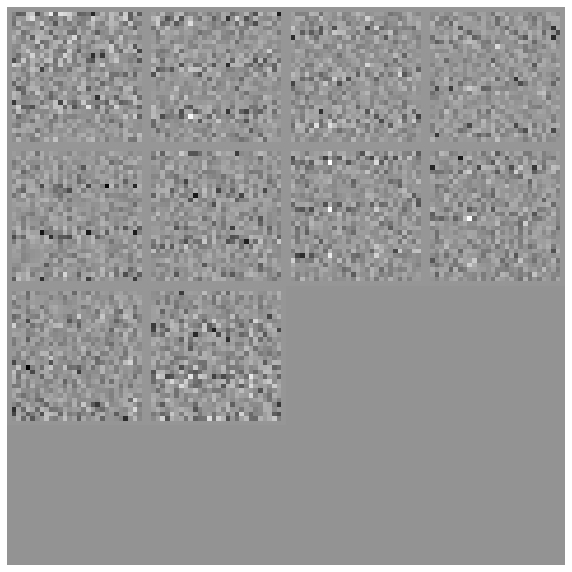

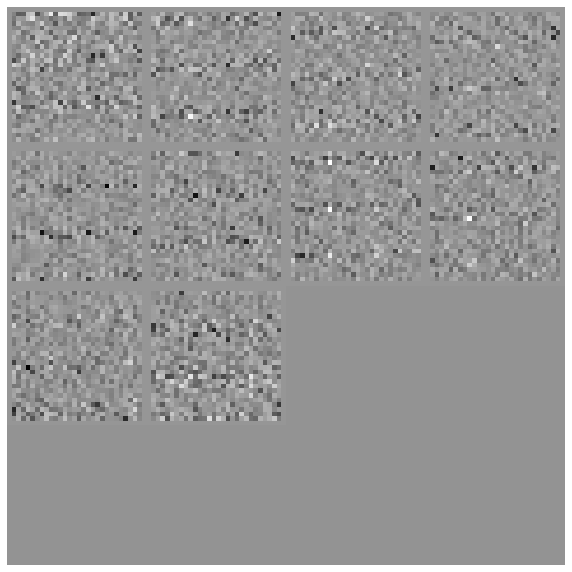

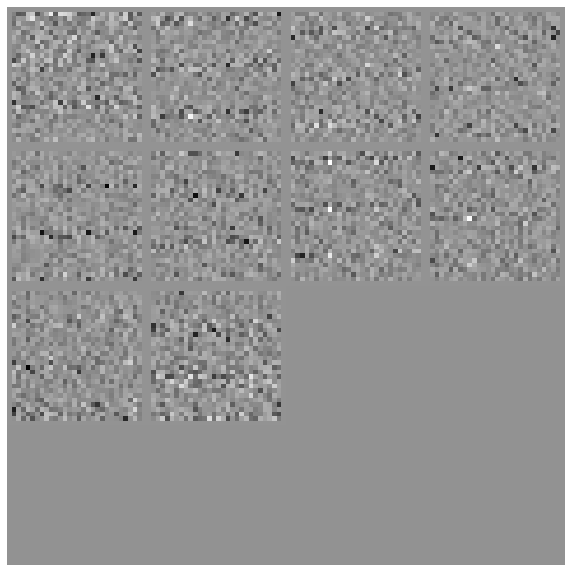

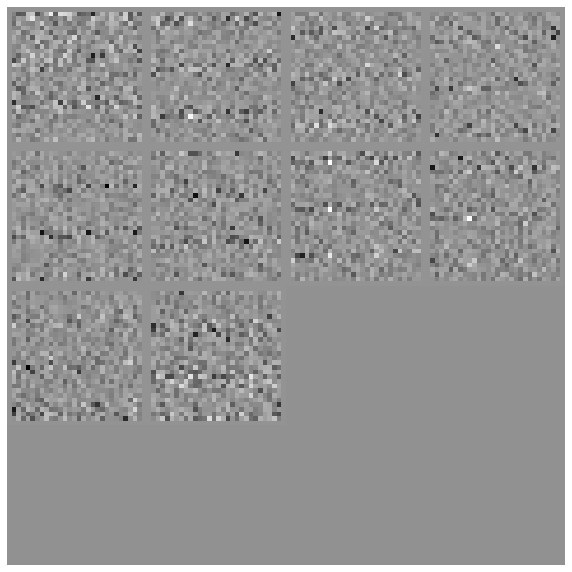

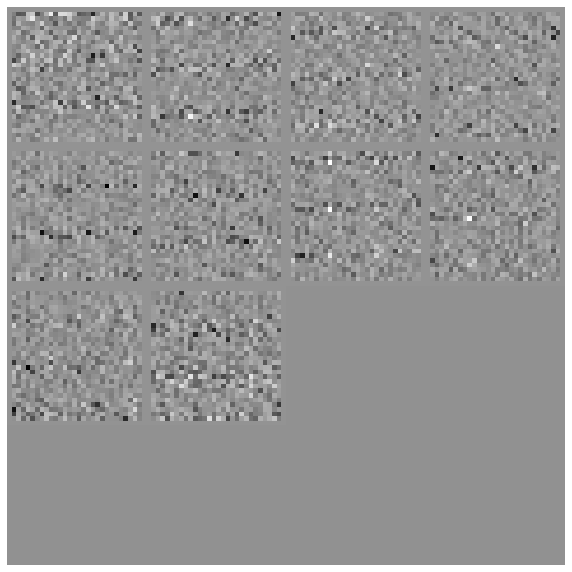

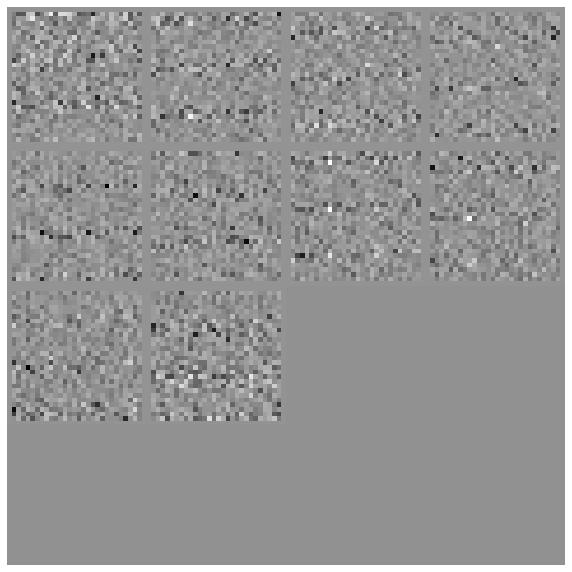

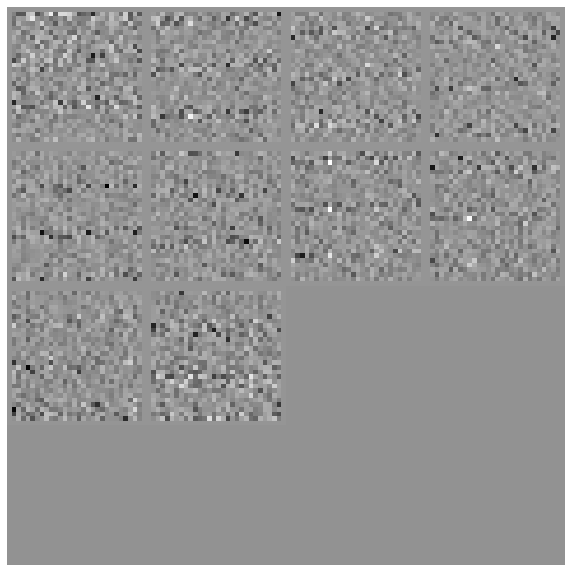

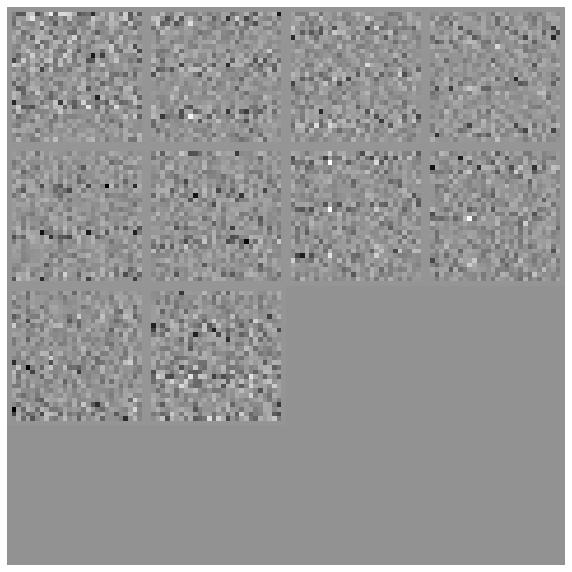

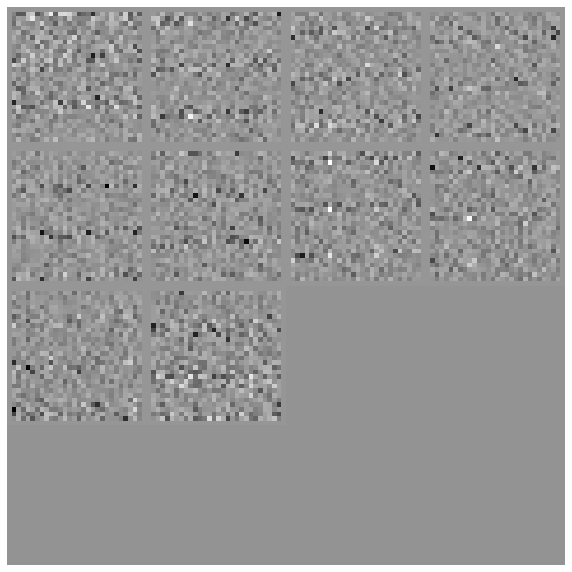

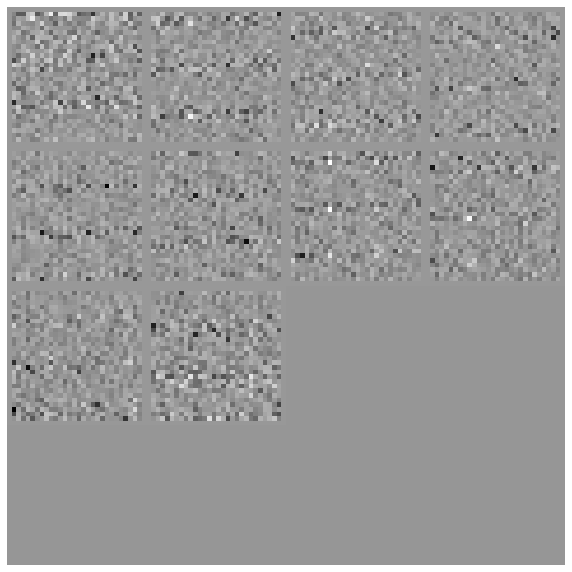

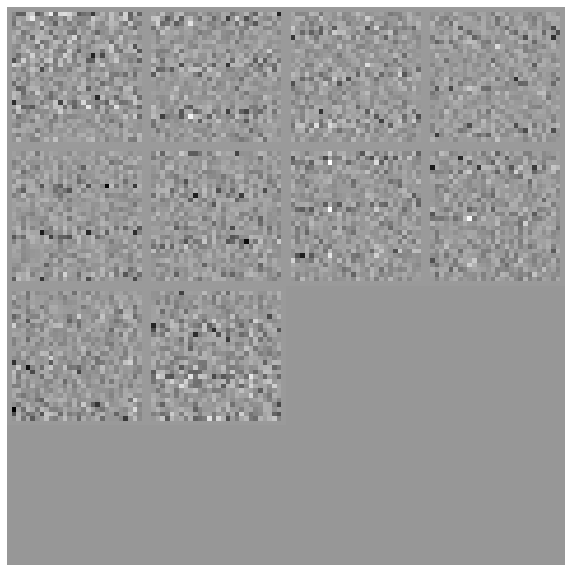

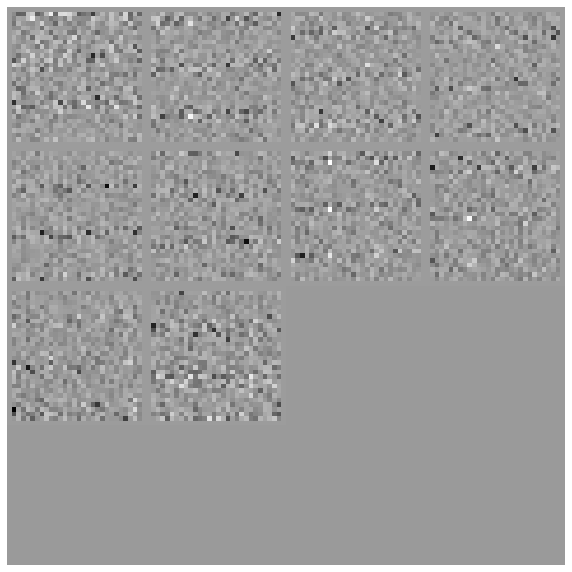

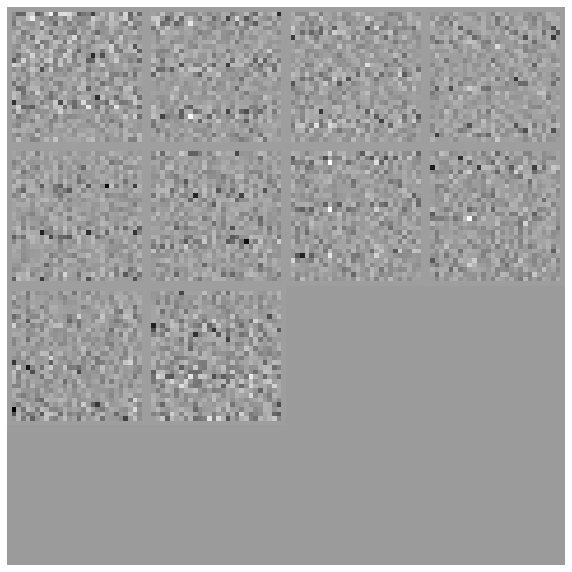

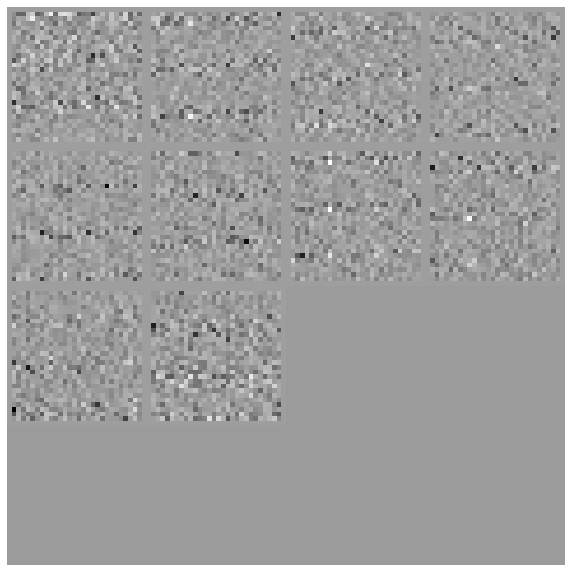

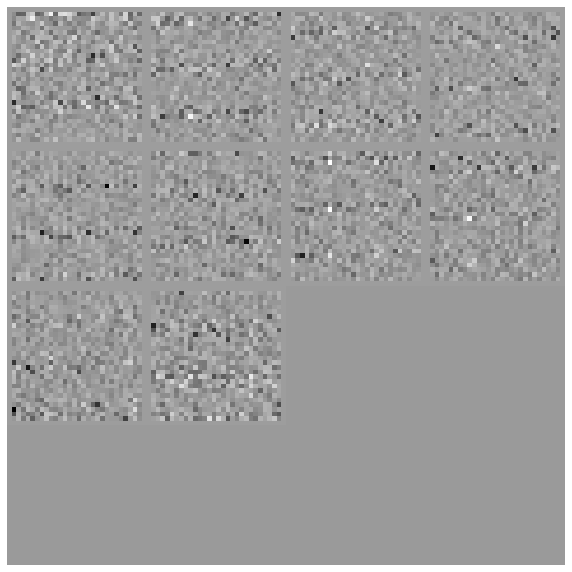

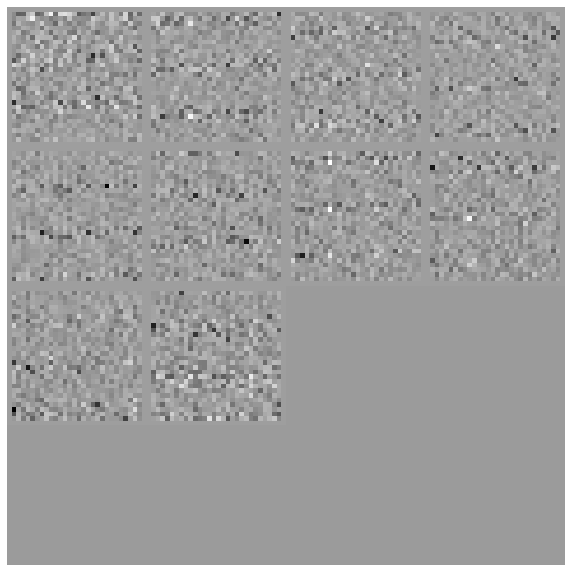

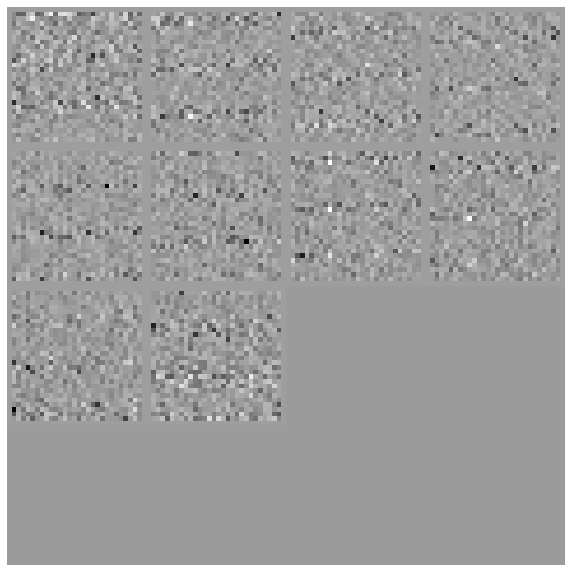

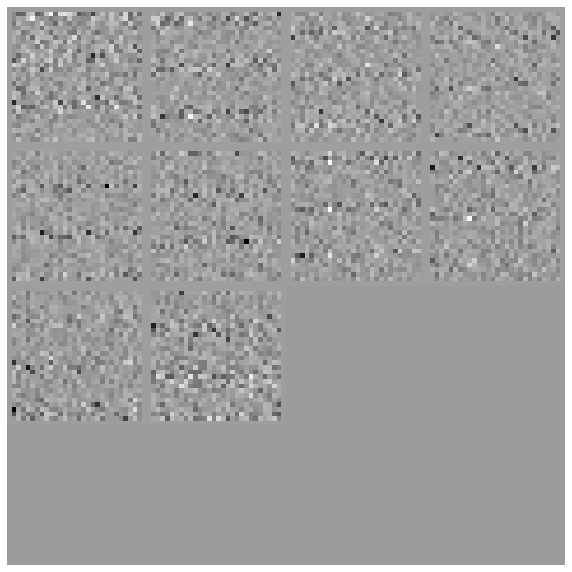

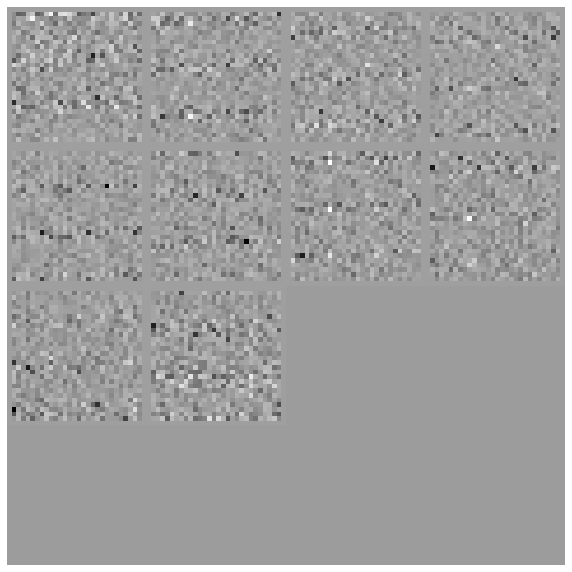

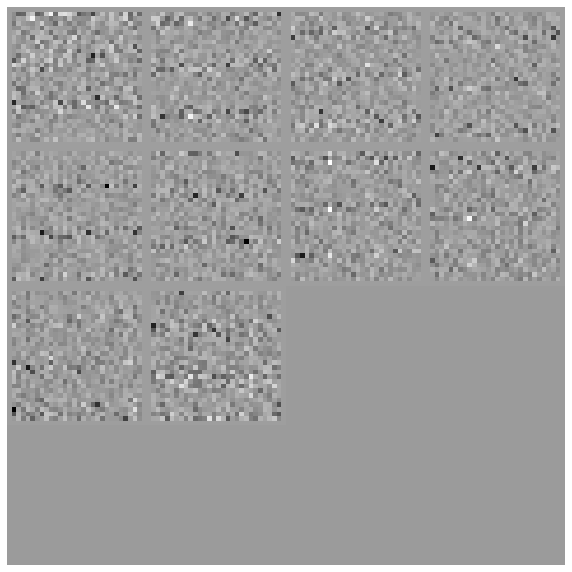

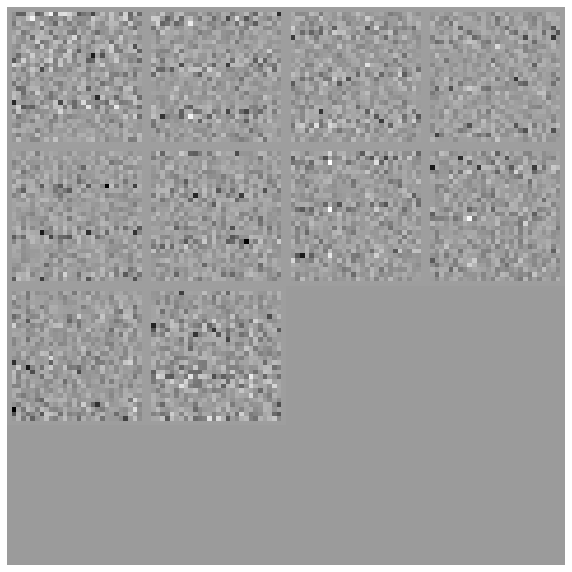

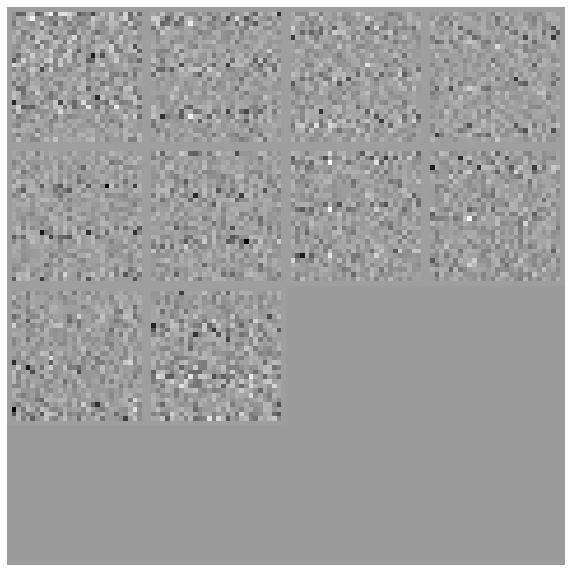

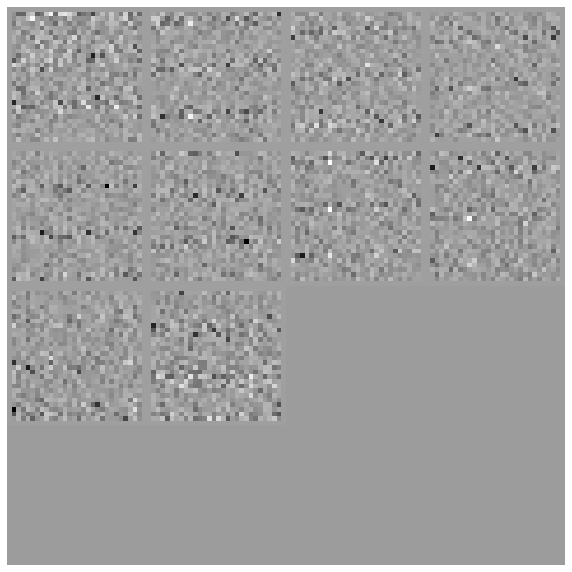

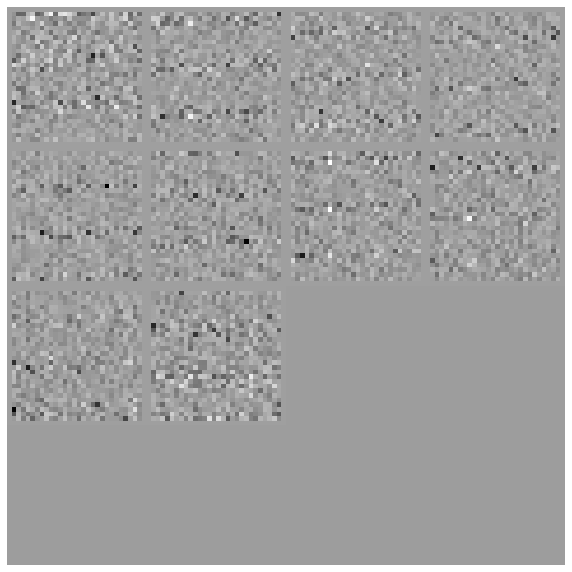

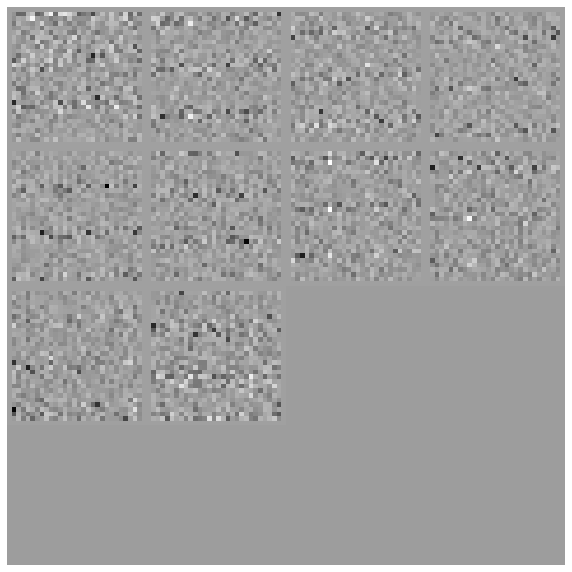

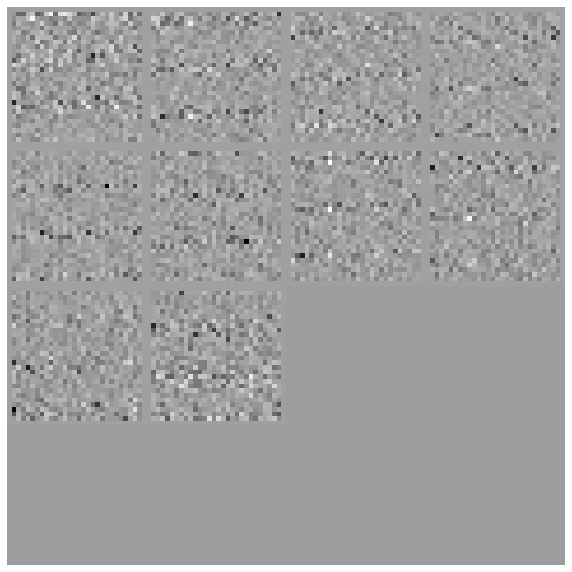

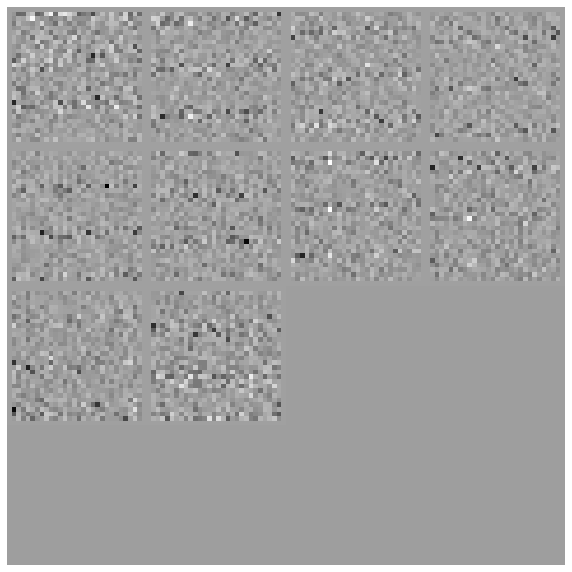

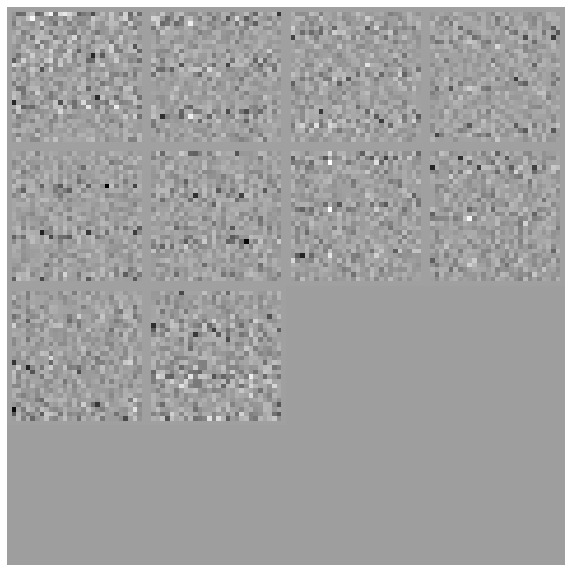

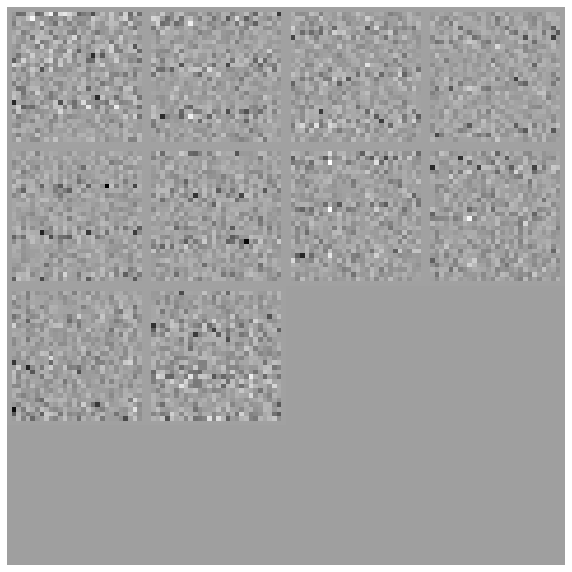

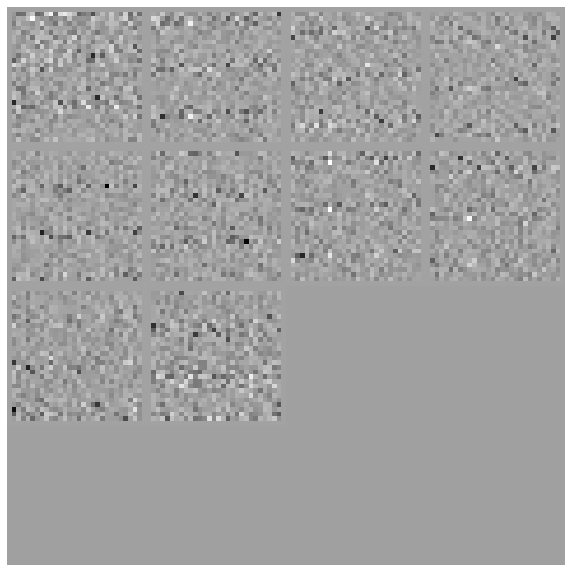

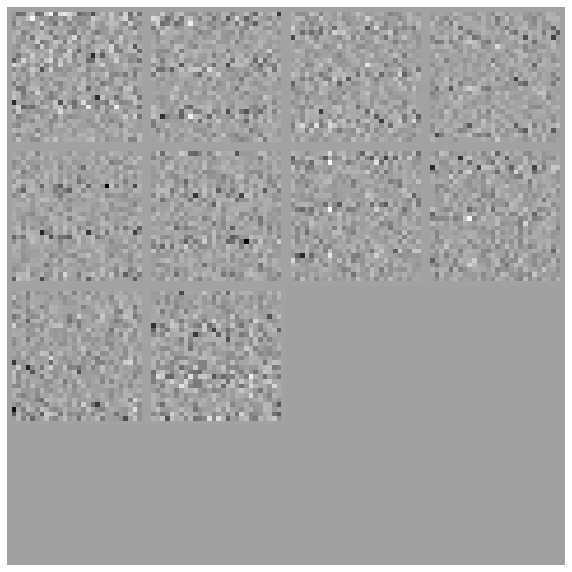

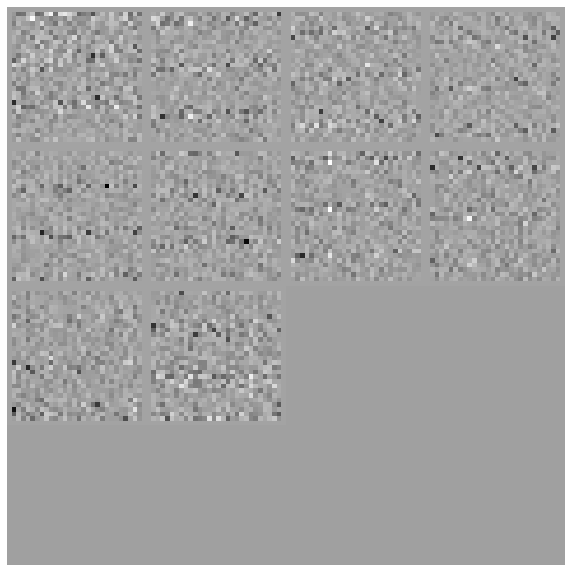

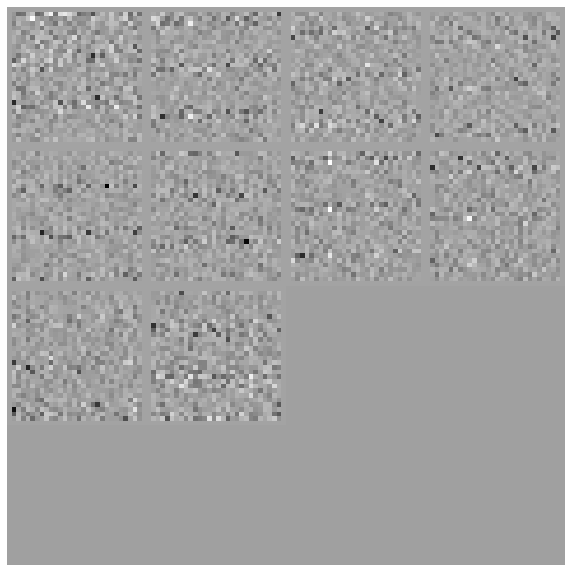

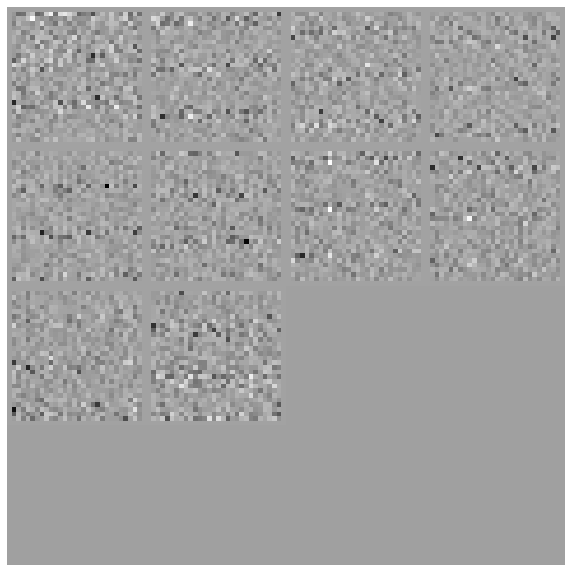

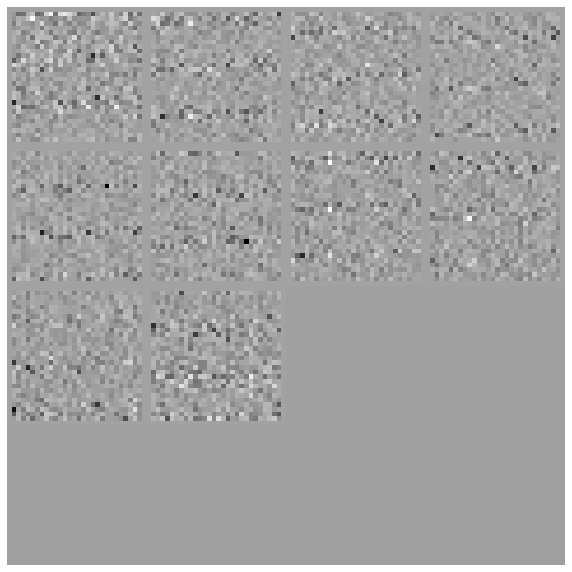

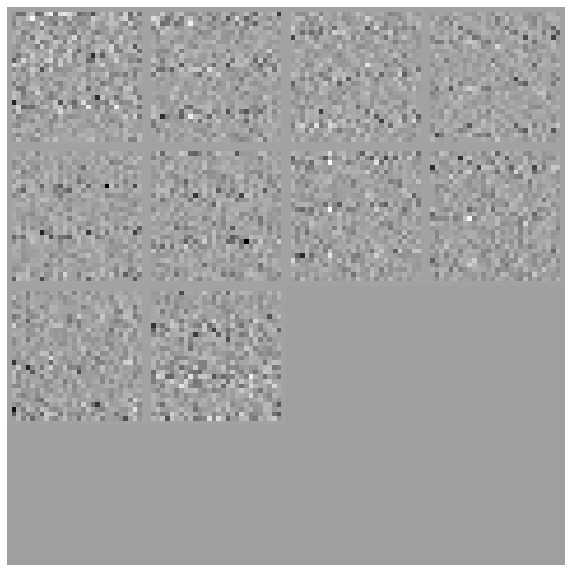

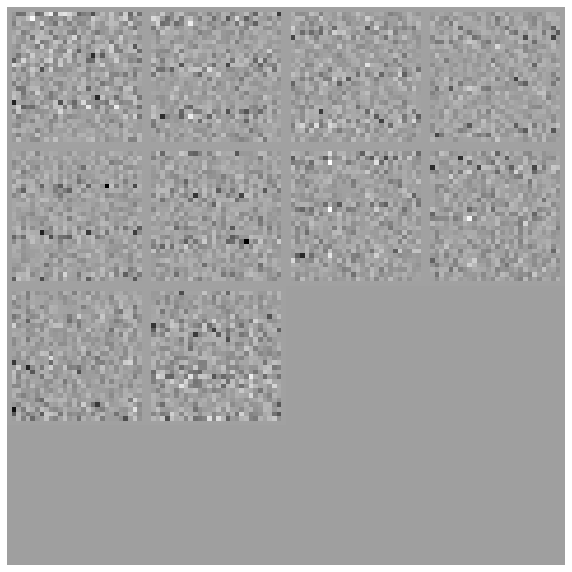

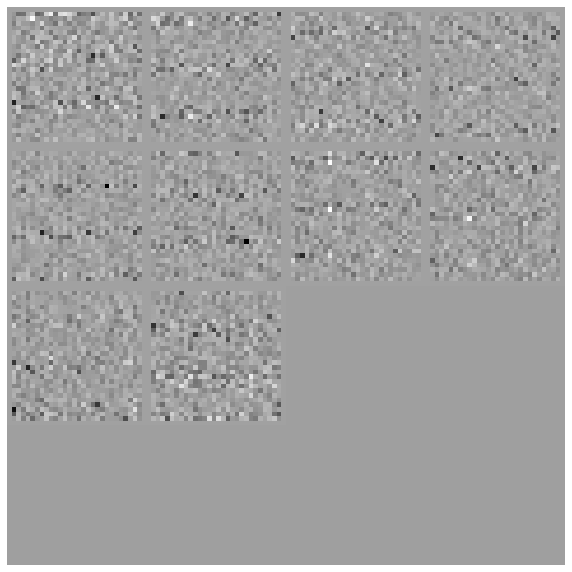

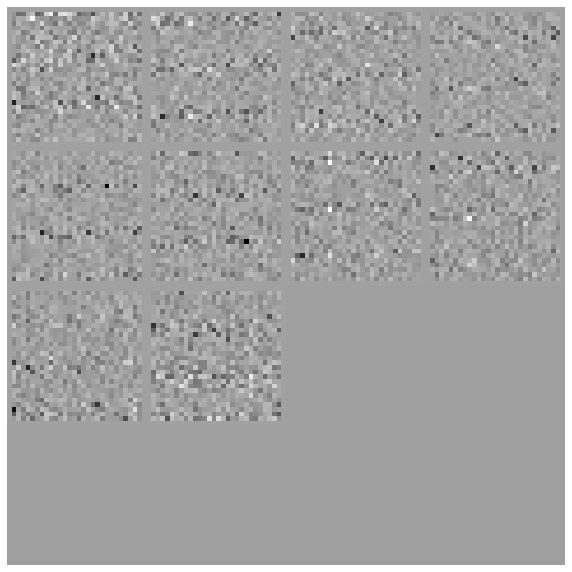

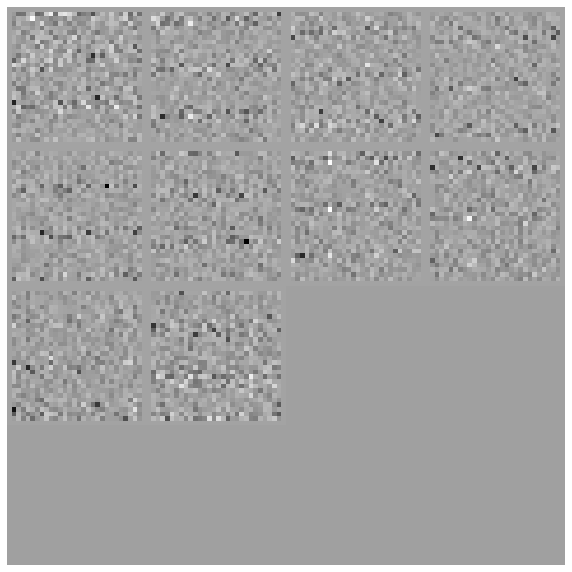

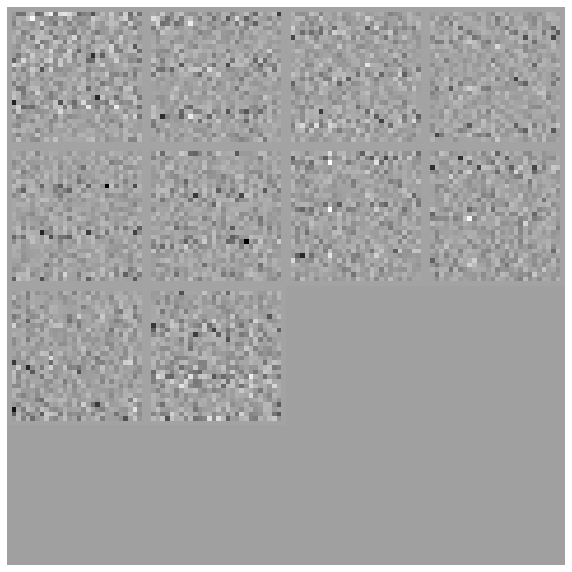

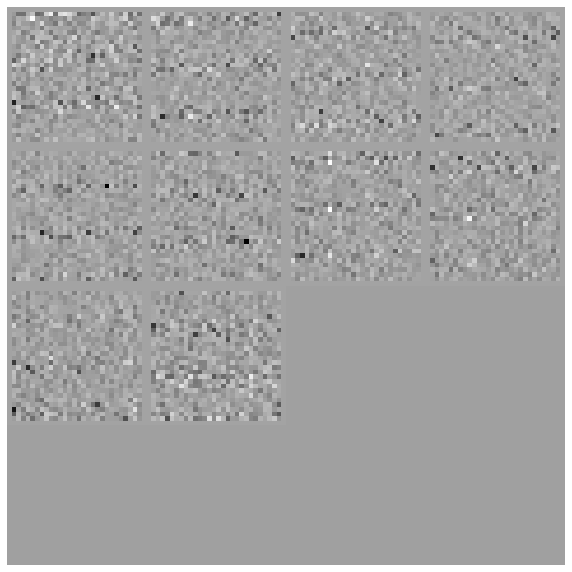

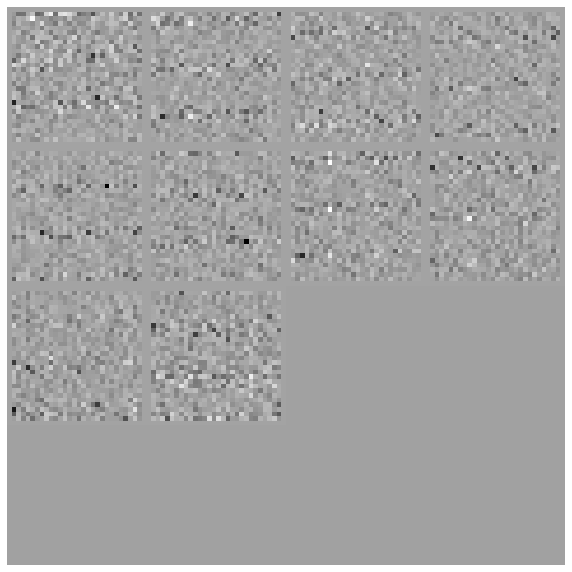

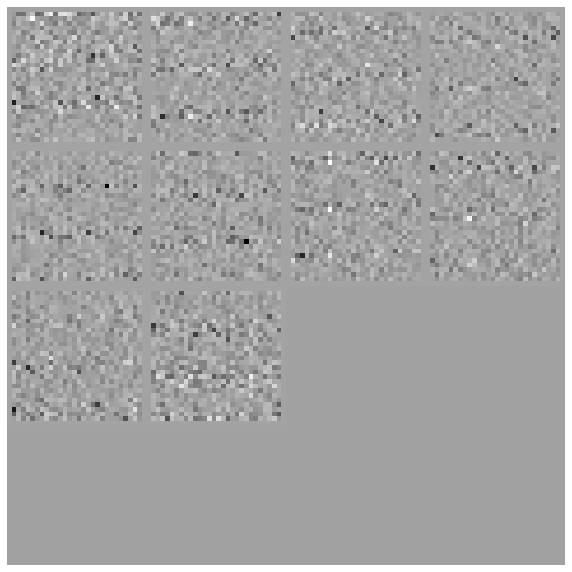

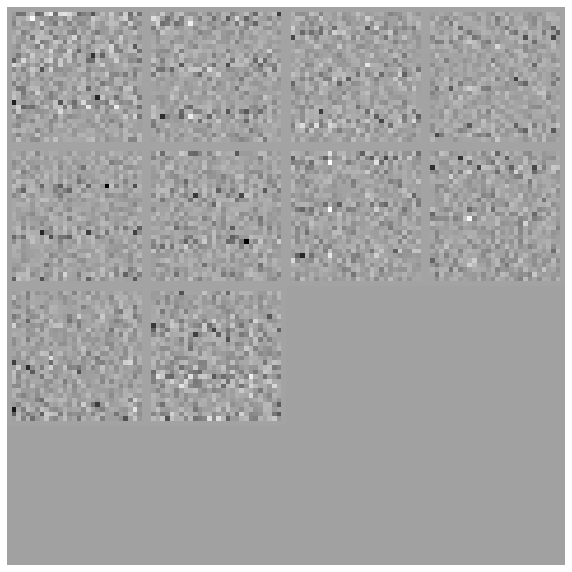

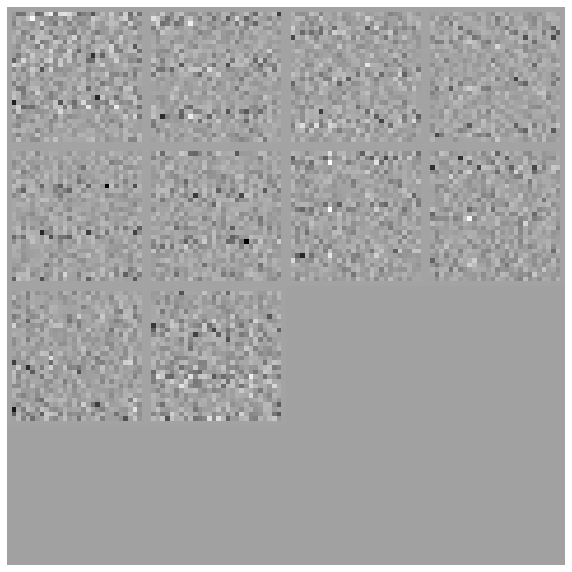

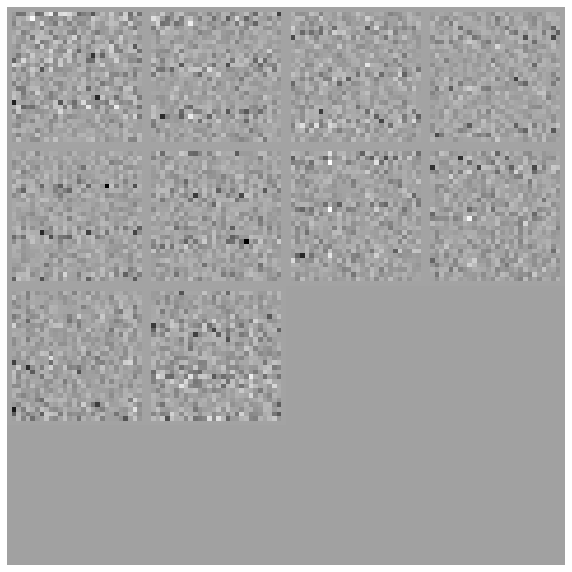

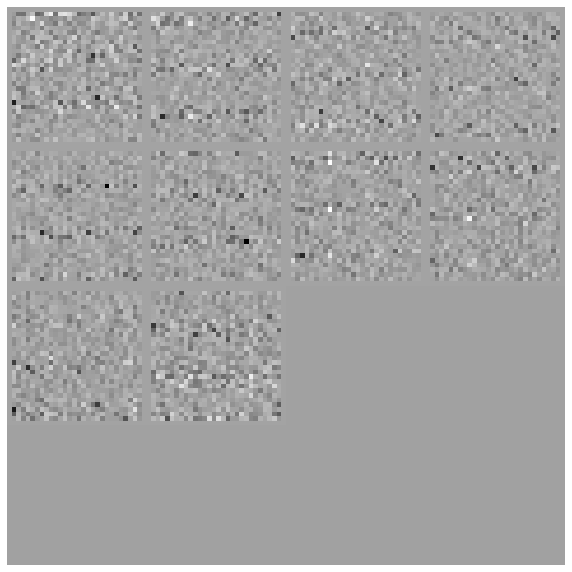

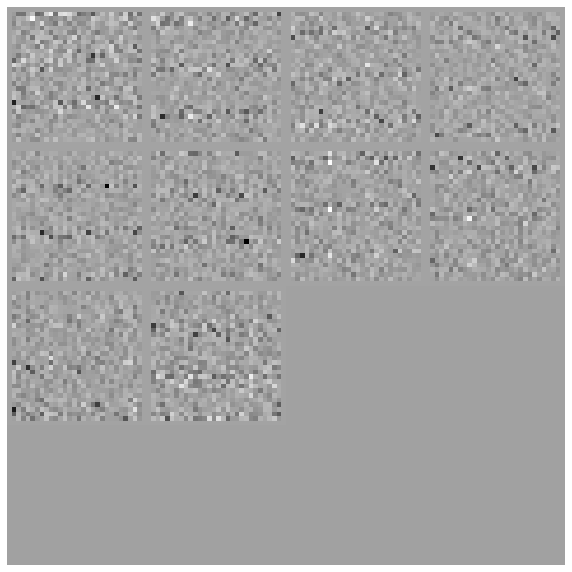

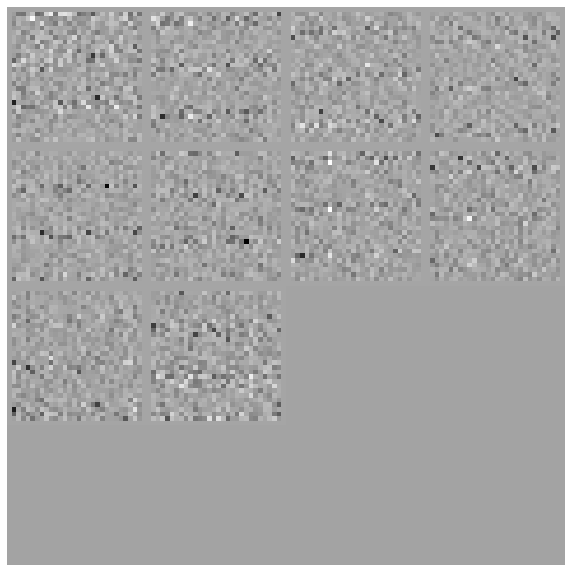

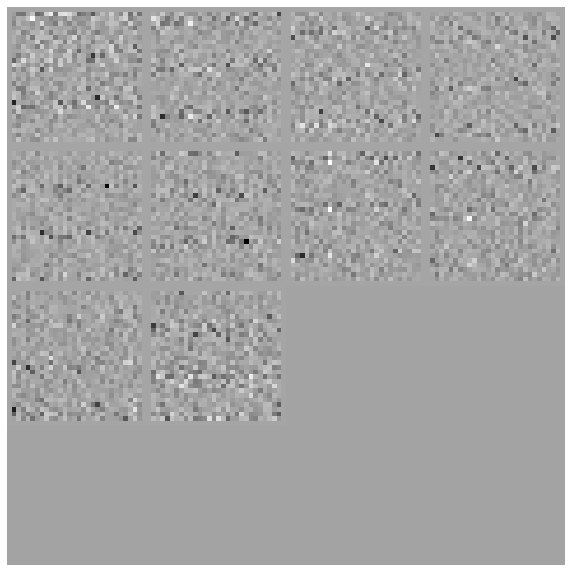

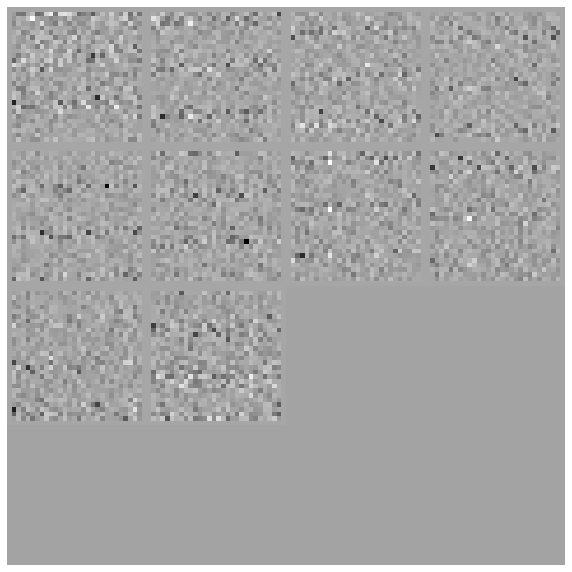

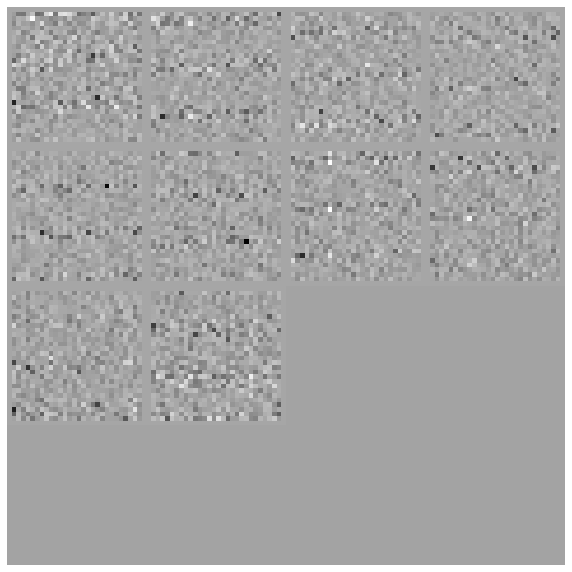

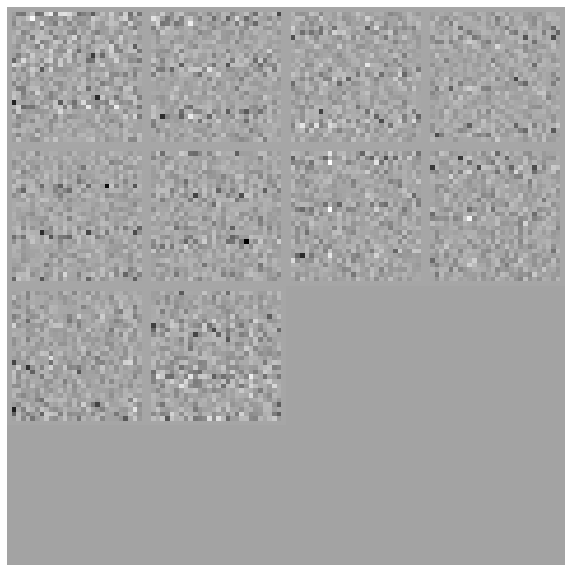

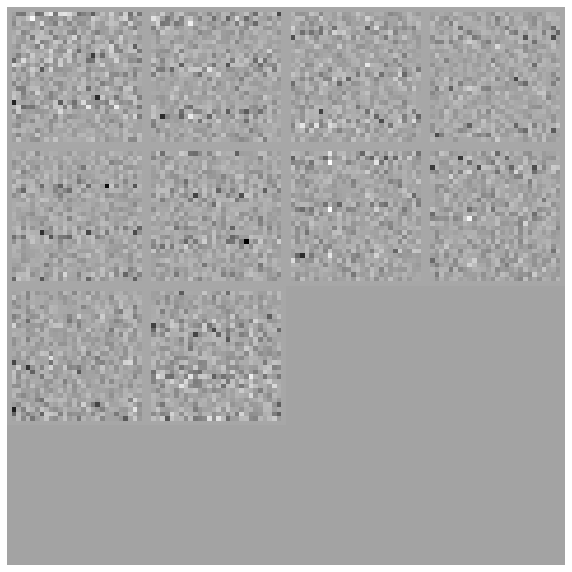

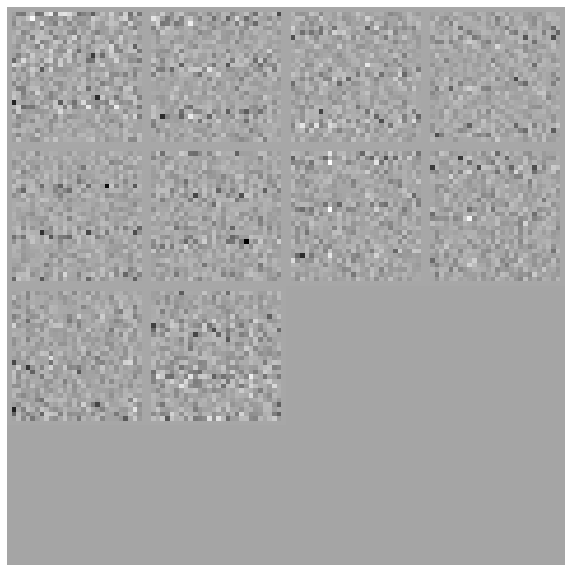

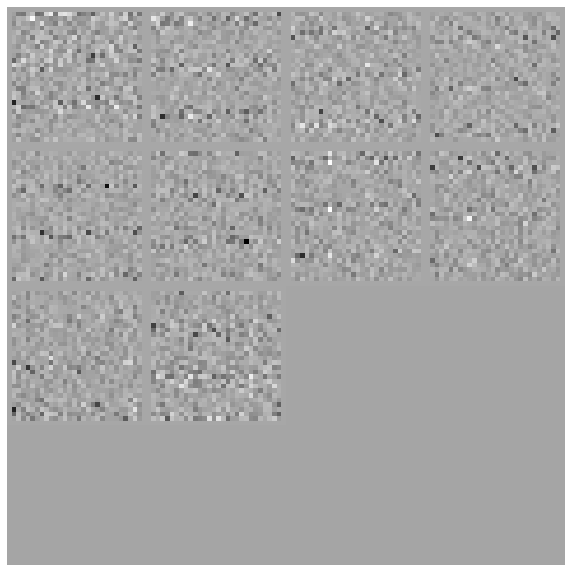

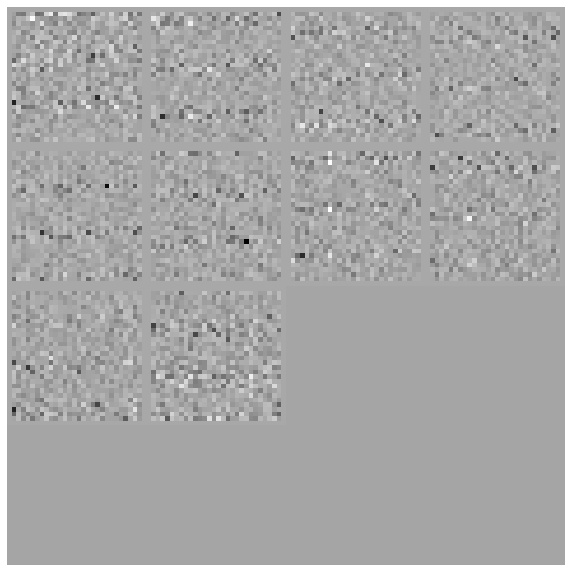

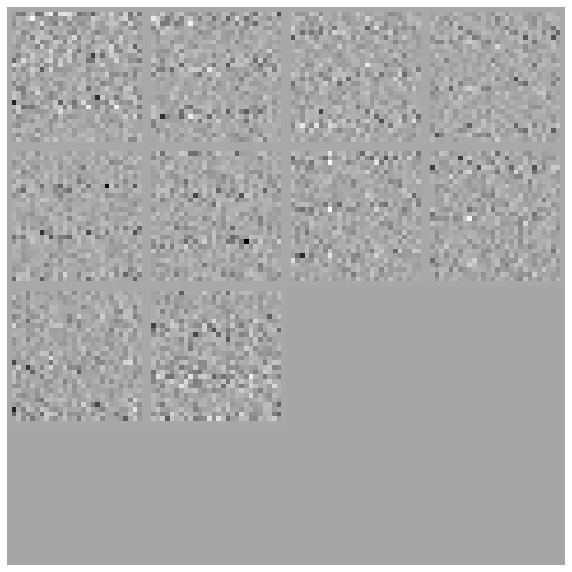

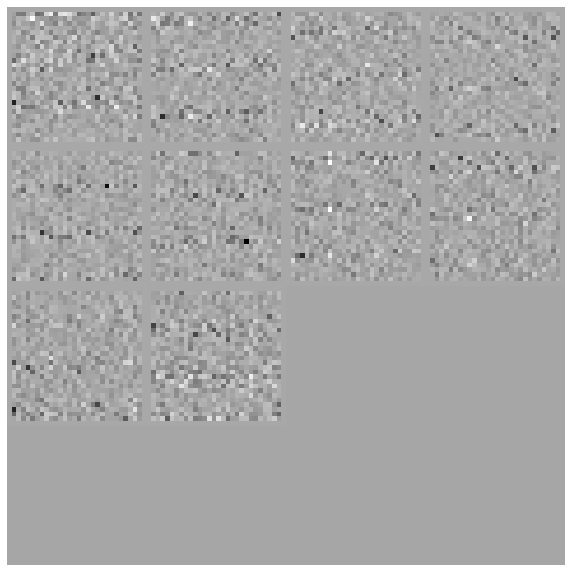

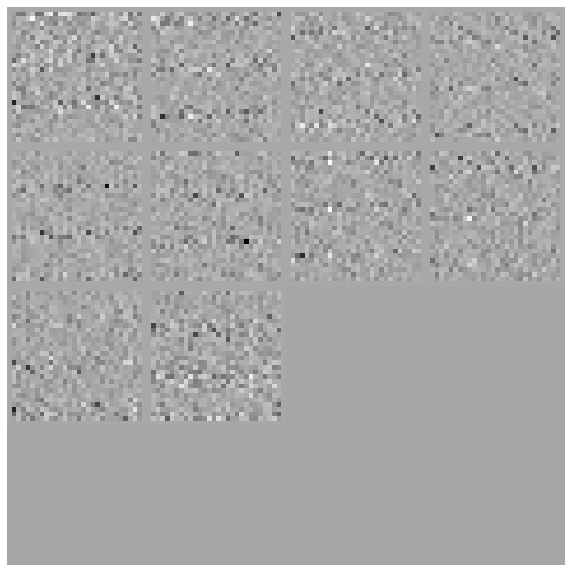

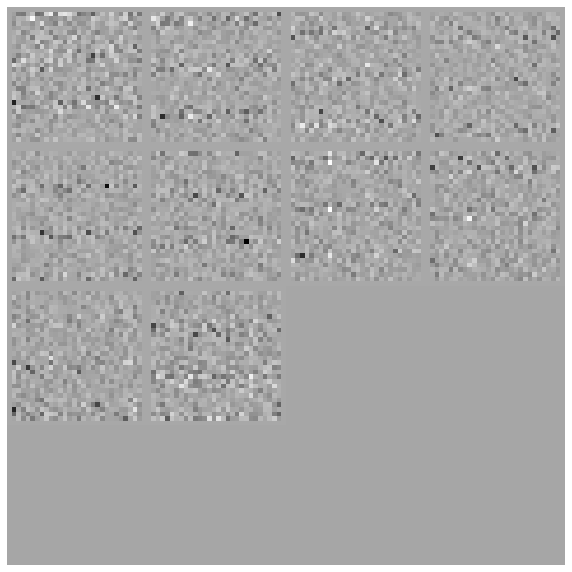

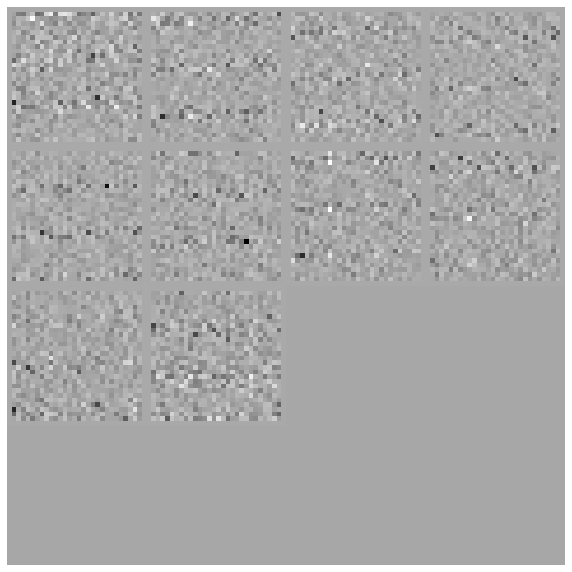

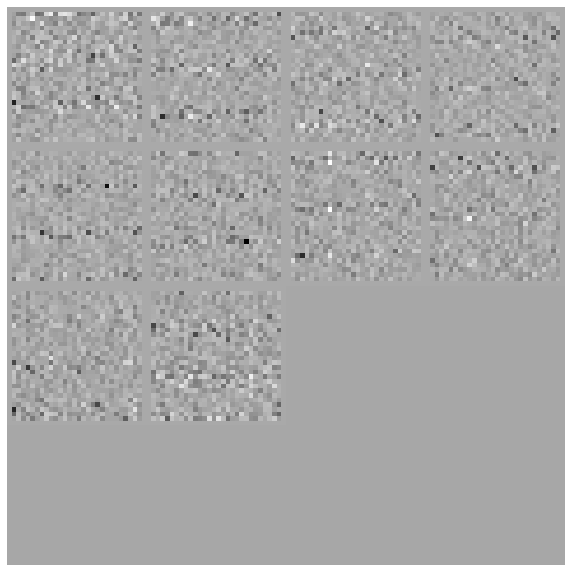

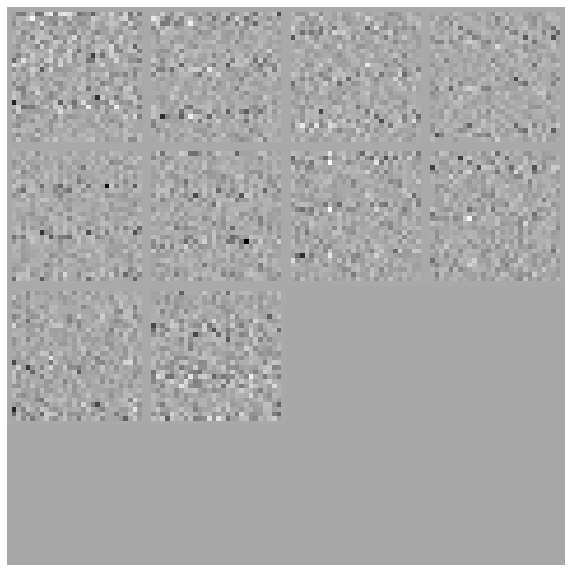

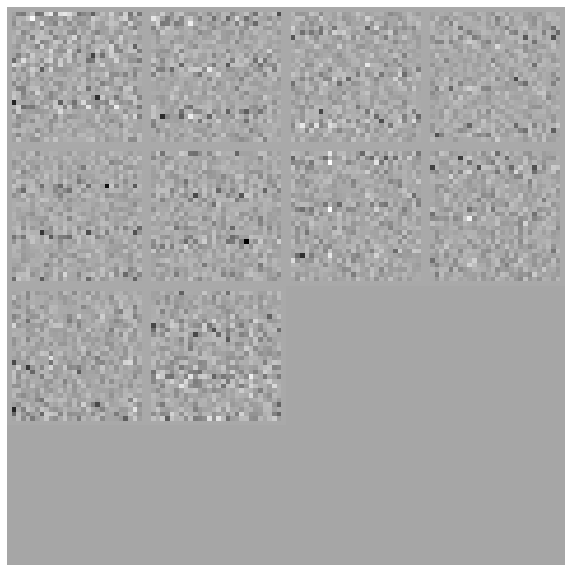

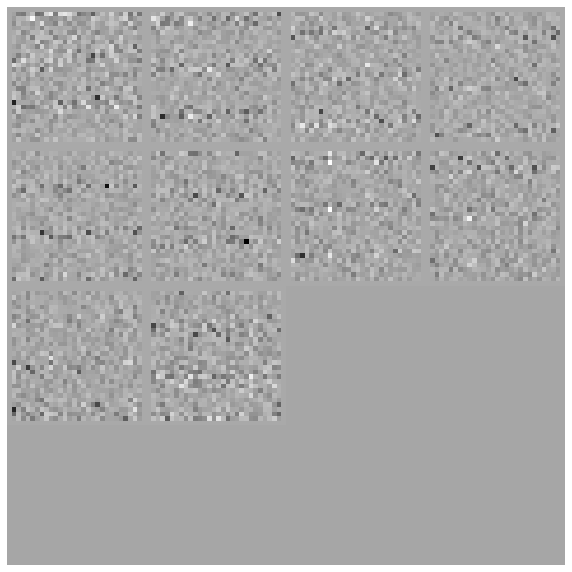

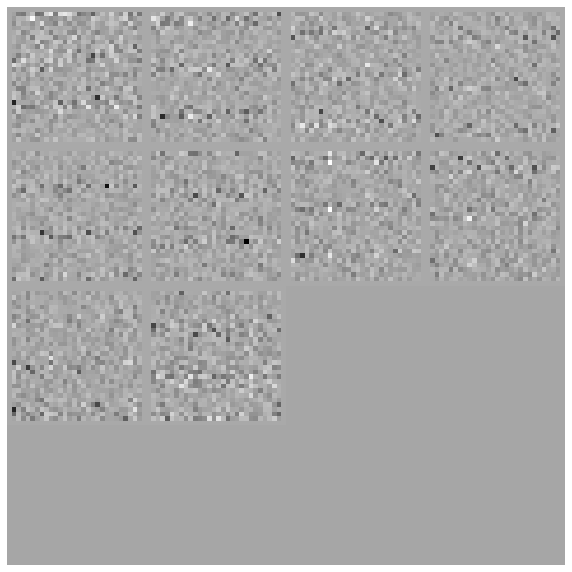

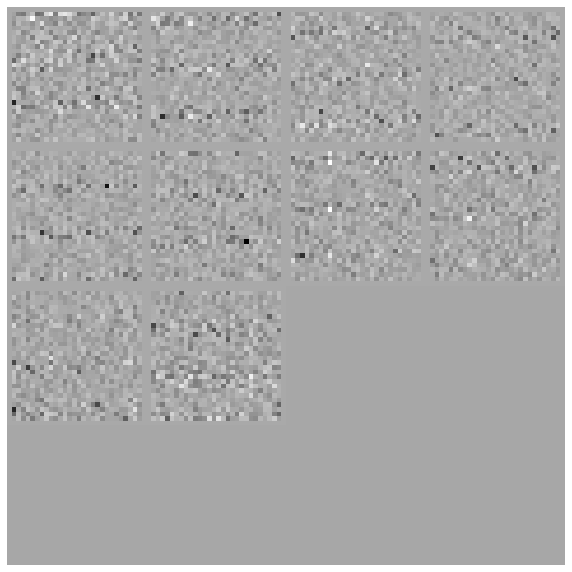

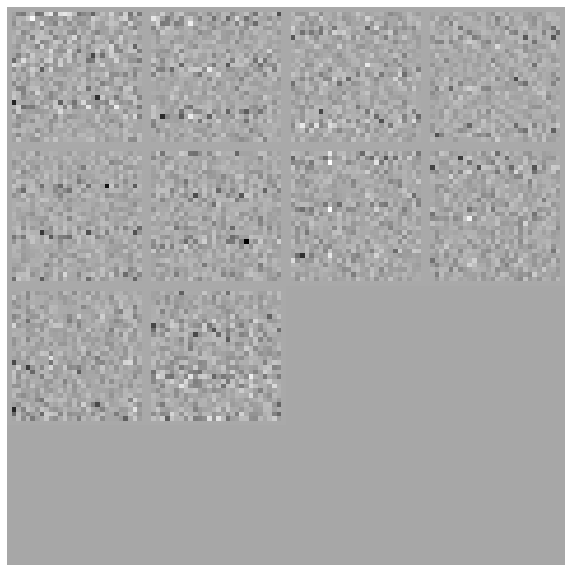

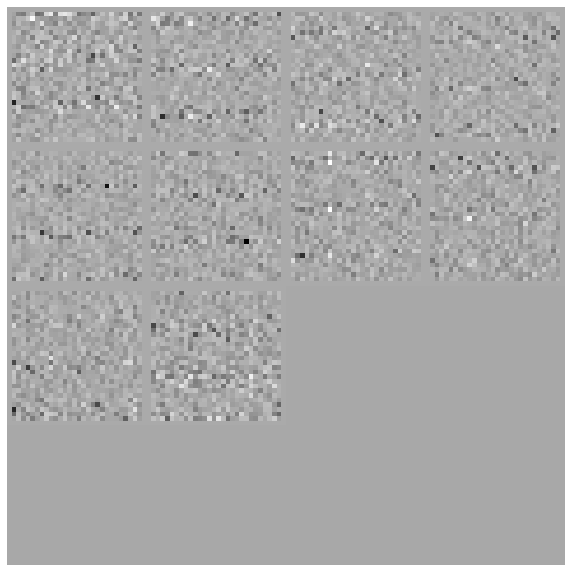

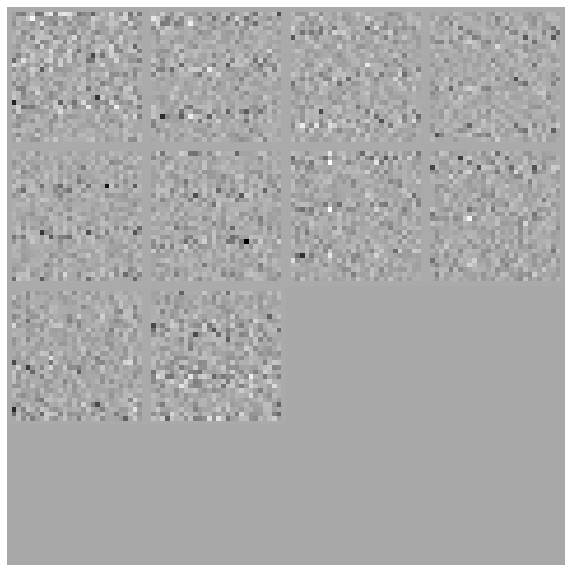

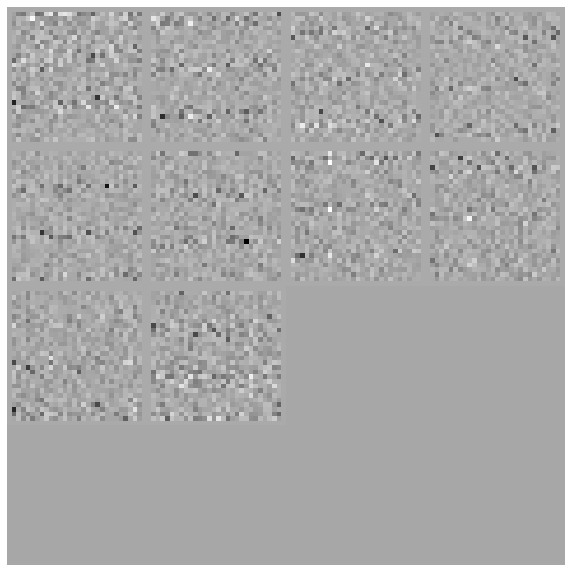

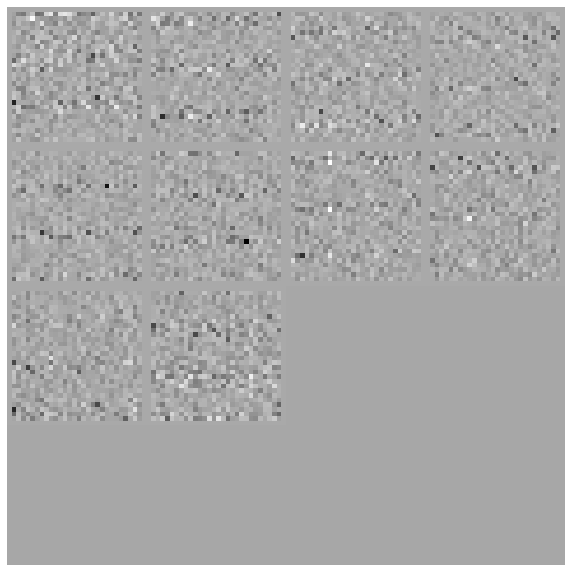

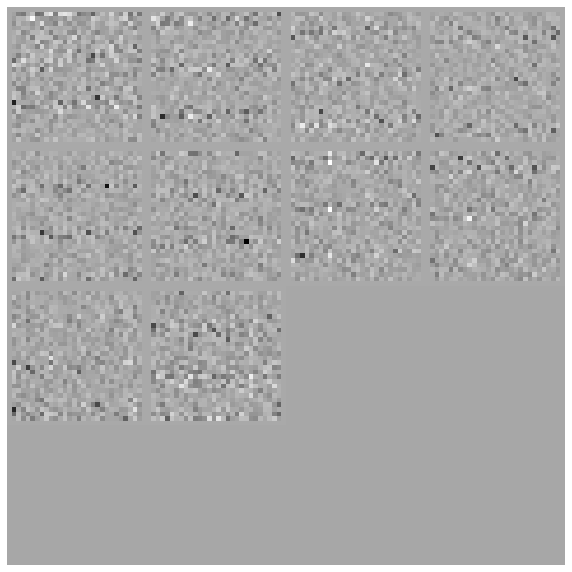

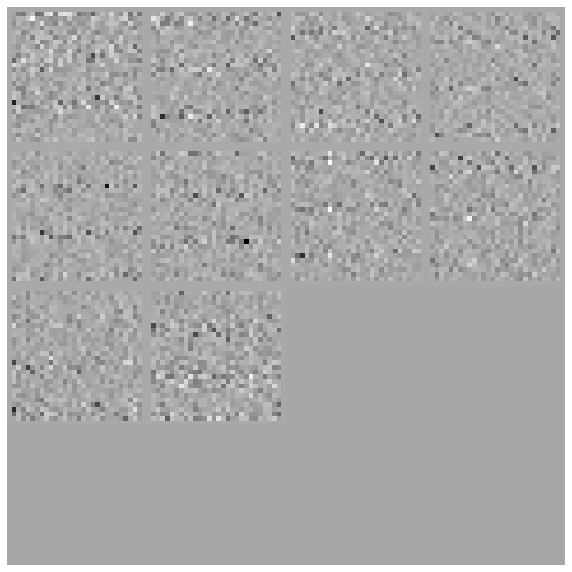

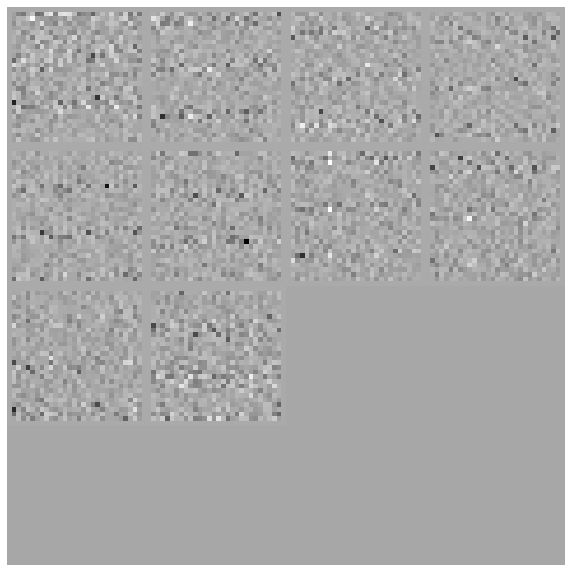

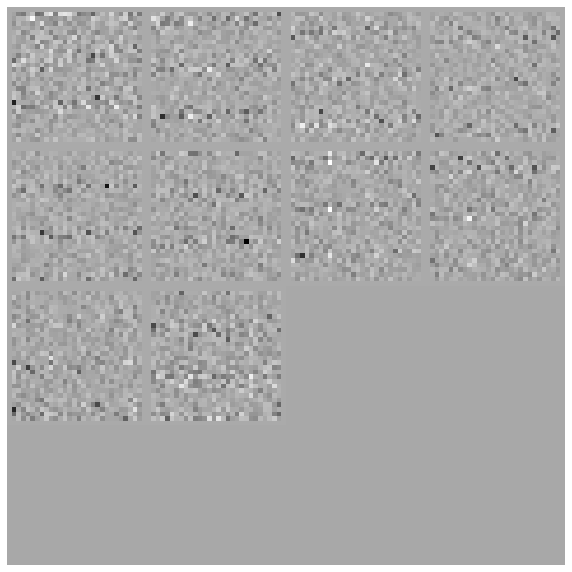

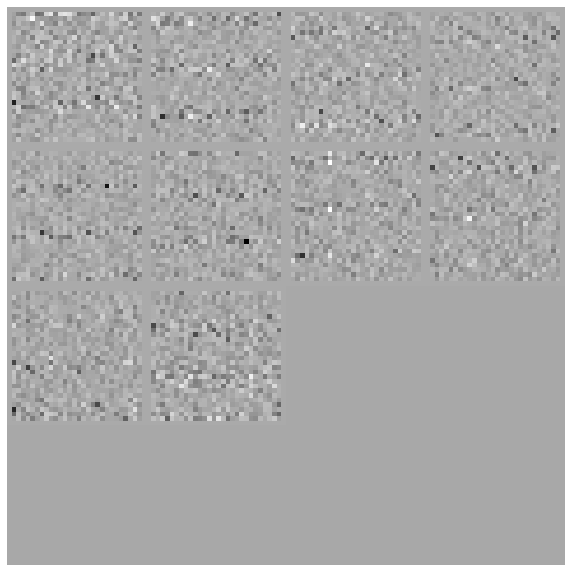

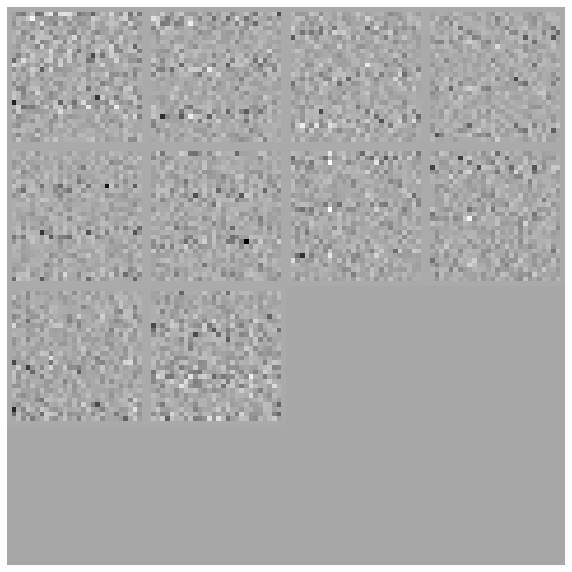

In [ ]:
wb.init(project="Simple_Linear_Adam_Fashion");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0]).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing